In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from scipy.optimize import curve_fit
from scipy import ndimage
from mpl_toolkits.axes_grid1 import make_axes_locatable
import multiprocessing as multi

%matplotlib inline

In [2]:
print(f"Your machine has {multi.cpu_count()} CPUs / cores")
pool = multi.Pool()


Your machine has 4 CPUs / cores


# Different order SZ spectrum with cluster parameters : T_e = 5 keV, tau = 0.01 and peculiar velocity  = 300 km/s

In [3]:

h = 6.62 * 1e-27  # in  cm^2 g s^-1
k = 1.38 * 1e-16  # in erg K^−1
c = 2.99 * 1e10  # in cm s^-1
t_cmb = 2.72  # in K
t_e = 5 # in keV
tau = 0.01
mu = 0.7 # mu = cos (theta)
v = 0.001 # peculiar velocity = 300km/s / c

# computing y parameter
y = (t_e/511) * tau

print("y_value =",y)

y_value = 9.784735812133073e-05


In [4]:

h = 6.62 * 1e-27  # in  cm^2 g s^-1
k = 1.38 * 1e-16  # in erg K^−1
c = 2.99 * 1e10  # in cm s^-1
t_cmb = 2.72  # in K
t_e = 5 # in keV
tau = 0.01
mu = 0.7 # mu = cos (theta)
v = 0.001 # peculiar velocity = 300km/s / c

nu_planck = np.array([100.0, 143.0, 217.0, 353.0, 545.0, 857.0])  # Planck HFI frequencies
nu_CORE = np.array([70, 90, 145, 220, 340, 450, 600]) # CORE frequencies
nu_cmbs4 = np.array([93, 145, 225, 280]) # CMBS4 frequencies

def calculate_tSZ_SED(nu):
    
    tSED = []
    
    for i in range(len(nu)):
        
        x = (h * nu[i] * 1e9 )/(k * t_cmb)
        F = x * (1 / np.tanh(x / 2))
        spec = (-4 + F) 
        tSED.append(spec)
        
    return tSED

tSZ_spec_planck = calculate_tSZ_SED(nu_planck)
tSZ_spec_CORE = calculate_tSZ_SED(nu_CORE)
tSZ_spec_cmbs4 = calculate_tSZ_SED(nu_cmbs4)

print("tSZ_SED_planck  =",tSZ_spec_planck,'\n')
print("tSZ_SED_CORE = ",tSZ_spec_CORE,'\n')
print("tSZ_SED_CMBS4 = ", tSZ_spec_cmbs4,'\n')

def calculate_rksz_SED(nu):
    
    rkSZSED = []
    
    for i in range(len(nu)):
        
        x = (h * nu[i] * 1e9)/(k * t_cmb)
        F = x * (1 / np.tanh(x / 2))
        spec = (-1 - mu ** 2 + ( (3 + 11 * mu ** 2) / (20)) * F) 
        rkSZSED.append(spec)
        
    return rkSZSED

rkSZ_spec_planck = calculate_rksz_SED(nu_planck)
rkSZ_spec_CORE = calculate_rksz_SED(nu_CORE)
rkSZ_spec_cmbs4 = calculate_rksz_SED(nu_cmbs4)

print("rkSZ_SED_planck  = ",rkSZ_spec_planck, '\n')
print("rkSZ_SED_CORE = ", rkSZ_spec_CORE, '\n')
print("rkSZ_SED_CMBS4 = ", rkSZ_spec_cmbs4, '\n')

def calculate_tkSZ_SED(nu):
     
    tkSZSED = []
    
    for i in range(len(nu)):
        
        x = (h * nu[i] *1e9 )/(k * t_cmb)
        F = x * (1 / np.tanh(x / 2))
        G = x / np.sinh(x / 2)
        spec =  (10 - 9.4 * F + 0.7 * ( 2 * np.power(F, 2) + np.power(G, 2)) ) 
        tkSZSED.append(spec)
        
    return tkSZSED

tkSZ_spec_planck = calculate_tkSZ_SED(nu_planck)
tkSZ_spec_CORE = calculate_tkSZ_SED(nu_CORE)
tkSZ_spec_cmbs4 = calculate_tkSZ_SED(nu_cmbs4)

print("tkSZ_SED_planck  = ",tkSZ_spec_planck, '\n') 
print("tkSZ_SED_CORE  = ",tkSZ_spec_CORE, '\n')
print("tkSZ_SED_CMBS4 = ", tkSZ_spec_cmbs4, '\n')


def calculate_rtsz_SED(nu):
    
    rtSZSED = []
    
    for i in range(len(nu)):
        
        x = (h * nu[i] * 1e9)/(k * t_cmb)
        F = x * (1 / np.tanh(x / 2))
        G = x / np.sinh(x / 2)
        spec = (-10 + 23.5 * F - 8.4 * np.power(F, 2) + 0.7 * np.power(F, 3) + 1.4 * np.power(G, 2) * (-3 + F)) 
        rtSZSED.append(spec)
        
    return rtSZSED

rtSZ_spec_planck = calculate_rtsz_SED(nu_planck)
rtSZ_spec_CORE = calculate_rtsz_SED(nu_CORE)
rtSZ_spec_cmbs4 = calculate_rtsz_SED(nu_cmbs4)

print("rtSZ_SED_planck  = ", rtSZ_spec_planck, '\n')
print("rtSZ_SED_CORE = ", rtSZ_spec_CORE, '\n')
print("rtSZ_SED_CMBS4 = ", rtSZ_spec_cmbs4, '\n')



tSZ_SED_planck  = [-1.5066230806146135, -1.0376059260138728, -0.0025390368924740336, 2.2503279961409683, 5.613126058699526, 11.114405093184613] 

tSZ_SED_CORE =  [-1.7522087681986758, -1.5967295456881212, -1.0129507508478115, 0.043636947647115676, 2.026286184879874, 3.9420575826200643, 6.582378423119982] 

tSZ_SED_CMBS4 =  [-1.5705287737955254, -1.0129507508478115, 0.12114049240971259, 1.0094931120319508] 

rkSZ_SED_planck  =  [-0.44402838231783015, -0.24727568596281957, 0.1869348740236072, 1.1320125943811365, 2.542706381624451, 4.850492936590946] 

rkSZ_SED_CORE =  [-0.5470515782593444, -0.48182804441616667, -0.23693283998065673, 0.2063056995379653, 1.0380270545571075, 1.8416931559091172, 2.949307748498833] 

rkSZ_SED_CMBS4 =  [-0.4708368206072229, -0.23693283998065673, 0.23881843656587454, 0.6114823604974038] 

tkSZ_SED_planck  =  [-2.559492095866309, -3.8697274967439252, -4.271457767738099, 6.155674043624224, 49.0310012282287, 187.74810449151877] 

tkSZ_SED_CORE  =  [-1.585726617041

# Different spectral distortion terms plotted with dimensionless frequency

<ipython-input-5-b44dfaac1460>:12: RuntimeWarning: invalid value encountered in true_divide
  h_x = (np.power(x,4) * np.exp(x))/((np.exp(x) - 1) ** 2)
<ipython-input-5-b44dfaac1460>:13: RuntimeWarning: divide by zero encountered in true_divide
  F = x * (1 / np.tanh(x / 2))
<ipython-input-5-b44dfaac1460>:13: RuntimeWarning: invalid value encountered in multiply
  F = x * (1 / np.tanh(x / 2))
<ipython-input-5-b44dfaac1460>:14: RuntimeWarning: invalid value encountered in true_divide
  G = x / np.sinh(x / 2)


Text(0, 0.5, '$\\delta I$  [in MJy/sr]')

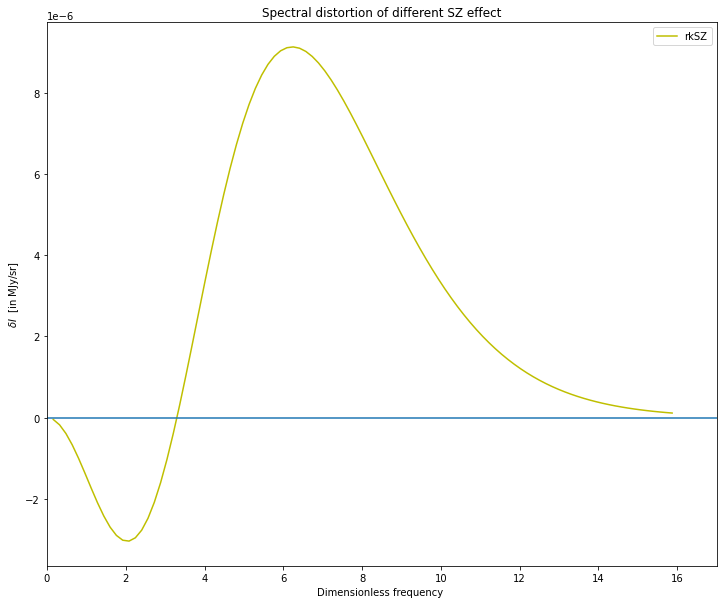

In [5]:

h = 6.62 * 1e-27  # in  cm^2 g s^-1
k = 1.38 * 1e-16  # in erg K^−1
c = 2.99 * 1e10  # in cm s^-1
t_cmb = 2.72  # in K
t_e = 5 # in keV
tau = 1e-2
mu = 0.7 # mu = cos (theta)
v = 0.001 # peculiar velocity in km/s / c

nu =  np.linspace(0,900,100) # frequency input
x = (h * nu * 1e9)/(k * t_cmb)# dimensionless frequency
h_x = (np.power(x,4) * np.exp(x))/((np.exp(x) - 1) ** 2)
F = x * (1 / np.tanh(x / 2))
G = x / np.sinh(x / 2)
theta_e = t_e / 511 #kT_e/m_e c^2
I_o = 270.33 # I_o = 2 (kT_CMB)^3/(hc)^2 = 270.33 MJy/sr
factor = tau * I_o * h_x 

def ksz():
    return factor * v * mu

def tsz():
    return factor * theta_e * (-4 + F)

def rksz():
    return factor  * v ** 2 * (-1 - mu ** 2 + ( (3 + 11 * mu ** 2) / (20)) * F)

def tksz():
    return factor * v * theta_e * mu * (10 - 9.4 * F + 0.7 * ( 2 * np.power(F, 2) + np.power(G, 2)))

def rtsz():
    return factor * theta_e ** 2 * (-10 + 23.5 * F - 8.4 * np.power(F, 2) + 0.7 * np.power(F, 3) + 1.4 * np.power(G, 2) * (-3 + F))

y_1 = ksz() #* 1e1
y_2 = tsz() 
y_3 = rksz() #* 1e3
y_4 = tksz() #* 1e2
y_5 = rtsz() 
#plt.plot(x, y_1, "r-", label = "kSZ") 
#plt.plot(x, y_2, "g-", label = "tSZ" )
plt.plot(x, y_3, "y-", label = "rkSZ")
#plt.plot(x, y_4, "k-", label = "tkSZ")
#plt.plot(x, y_5, "c-", label = "rtSZ")
plt.gcf().set_size_inches(12,10)
plt.axhline(0.0)
plt.xlim(0,17)
plt.legend()
plt.title("Spectral distortion of different SZ effect")
plt.xlabel("Dimensionless frequency ")
plt.ylabel("$\delta I$  [in MJy/sr]")
#plt.savefig("/home/kaushik/Workspace/Master's Thesis/Codes_jupyter_notebook/Plots/spectral distortions.pdf", dpi = 300)

# Input y parameter from Beta model

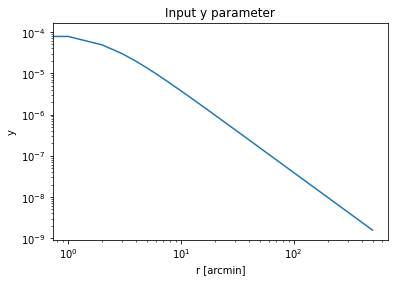

In [6]:
# beta model 
r = np.arange(0,500)#np.linspace(0,10,10) # radius in arcmins
#print(r)
r_c = 2 # core radius in arcmins
beta = 1
y_0 = 9.8e-5 # peak amplitude
 
y_beta = y_0 * ( 1 + ( r / r_c) ** 2) ** ((1 - 3 * beta)/2)


plt.plot(y_beta)
plt.title("Input y parameter")
plt.xlabel("r [arcmin]")
plt.ylabel("y")
plt.xscale('log')
plt.yscale('log')
#plt.savefig("/home/kaushik/Workspace/Master's Thesis/Codes_jupyter_notebook/Plots/Input_y_parameter.pdf")
#print(y_beta)

# Input tau parameter

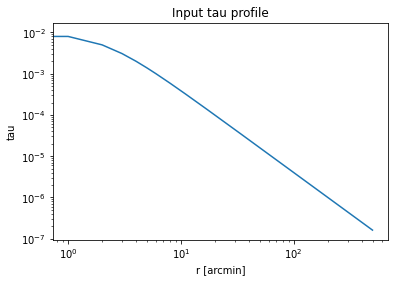

In [7]:
t_e = 5
r = np.arange(0,500)#np.linspace(0,10,10) # radius in arcmins
tau_pro = (511 * y_beta) / t_e

plt.plot(tau_pro)
plt.title("Input tau profile")
plt.xlabel("r [arcmin]")
plt.ylabel("tau")
plt.xscale('log')
plt.yscale('log')
#plt.savefig("/home/kaushik/Workspace/Master's Thesis/Codes_jupyter_notebook/Plots/Input_tau_profile.pdf")

# CMB Map

In [8]:
ell, DlTT = np.loadtxt("CAMB_fiducial_cosmo_scalCls.txt", usecols=(0, 1), unpack=True) 


#Setting size of the map

N = 256      # number of pixels in a linear dimension
            
pix_size  = 0.25 # size of a pixel in arcminutes

## Setting up the map plots

c_min = -400              # minimum for color bar
c_max = 400               # maximum for color bar
X_width = N * pix_size/60.  # horizontal map width in degrees
Y_width = N * pix_size/60.  # vertical map width in degrees

In [9]:
def make_CMB_T_map(N,pix_size,ell,DlTT):  # makes a realization of a simulated CMB sky map given an input D_l(TT) as a function of l
     
# convert D_l to C_l       
    ClTT = (DlTT * 2 * np.pi) / (ell * (ell + 1)) 
    ClTT[0] = 0.                          # set the monopole and the dipole of the C_l spectrum to zero
    ClTT[1] = 0.
   
    
# make a 2D real space coordinate system

    onesvec = np.ones(N)
    inds  = (np.arange(N) + .5 - N/2.) / (N-1.) # create an array of size N between -0.5 and +0.5
   
# compute the outer product matrix: X[i, j] = onesvec[i] * inds[j] for i,j 
# in range(N), which is just N rows copies of inds - for the x dimension
    X = np.outer(onesvec,inds) 

# compute the transpose for the y dimension
    Y = np.transpose(X)

# radial component 
    R = np.sqrt( X**2. + Y**2.)
   

# 2D CMB power spectrum

    pix_to_rad = (pix_size/60. * np.pi/180.) 
    ell_scale_factor = 2. * np.pi /pix_to_rad 
    ell2d = R * ell_scale_factor            # making a fourier space analogue to the real space R vector
    ClTT_expanded = np.zeros(int(ell2d.max())+1) 
    ClTT_expanded[0:(ClTT.size)] = ClTT     # fill in the Cls until the max of the ClTT vector

# the 2D Cl spectrum is defined on the multiple vector set by the pixel scale
    CLTT2d = ClTT_expanded[ell2d.astype(int)] 
#plt.imshow(np.log(CLTT2d))

#realization of the CMB with the given power spectrum in real space
    random_array_for_T = np.random.normal(0,1,(N,N))
    FT_random_array_for_T = np.fft.fft2(random_array_for_T)   # take FFT since we are in Fourier space 
    FT_2d = np.sqrt(CLTT2d) * FT_random_array_for_T 

# move back from ell space to real space
    CMB_T = np.fft.ifft2(np.fft.fftshift(FT_2d))

# move back to pixel space for the map
    CMB_T = CMB_T/(pix_size /60.* np.pi/180.)
    
# only plot the real component
    CMB_T = np.real(CMB_T)

    return(CMB_T)


In [10]:

def plot_map(x,y,map_title,map_plot,cbar_label):
    
    plt.gcf().set_size_inches(x,y)

    plt.title(map_title)
    image = plt.imshow(map_plot, cmap = 'jet', origin = 'lower')
    plt.colorbar(label=cbar_label)
    image.set_extent([0,X_width,0,Y_width])
    plt.ylabel('angle $[^\circ]$')
    plt.xlabel('angle $[^\circ]$') 
    

In [11]:
## make a CMB T map

cmb_temp_map = make_CMB_T_map(N,0.25,ell,DlTT)

print("Variance of CMB temp map = ",np.var(cmb_temp_map),'\n')


Variance of CMB temp map =  5155.361794980378 



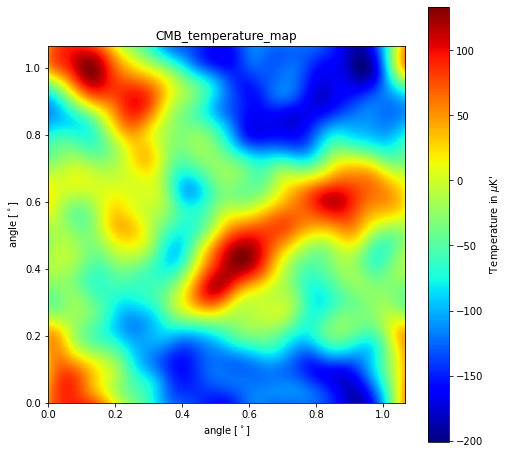

In [12]:

plot_cmb_temp_map = plot_map(8,8,"CMB_temperature_map",cmb_temp_map,"'Temperature in $\mu$K'")

#plt.savefig("/home/kaushik/Workspace/Master's Thesis/Codes_jupyter_notebook/Maps/CMB_temp_map.png" , dpi = 150)

# White noise map

In [13]:
noise = 2 #7.73, 3.34, 4.65, 15.6, 80.6, 1920 in muK arcmin

def create_noise_map(N,noise,pix_size):
    
    mu = 0 
    #sigma = noise / pix_size
    gaussian_random_noise_generation = mu + np.random.randn(N,N) * noise /pix_size
    #gaussian_random_noise = np.random.normal(0,1,(N,N)) * (noise/pix_size) # generates Gausssian random variables    
    #np.random.randn(npix,npix)*(sigma_noise/pixel_size)
    return gaussian_random_noise_generation

Noise_Map = create_noise_map(N,noise ,0.25) 

print(np.var(Noise_Map),'\n')
print(np.mean(Noise_Map ** 2),'\n')

#plt.plot(Noise_Map[200,:])

64.38080705561211 

64.38274247410138 



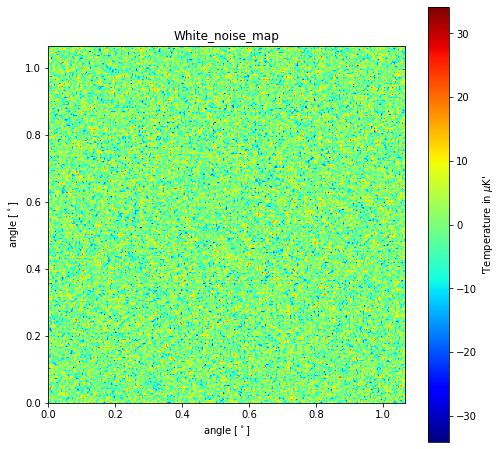

In [14]:
plot_white_noise_map = plot_map(8,8,"White_noise_map",Noise_Map,"'Temperature in $\mu$K'")

# Simulated y map using beta model

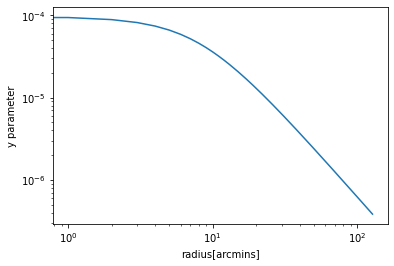

In [15]:
SZ_beta = 1
SZ_Theta_core = 2.0

def beta_function(N,pix_size,SZ_beta,SZ_Theta_core):
    
    SZ_beta = 1
    SZ_Theta_core = 2.0
    y_0 = 9.8e-5
    
    N = int(N)
    ones = np.ones(N)
    inds = (np.arange(N) + .5 - N/2.) * pix_size
    X = np.outer(ones,inds)
    Y = np.transpose(X)
    R = np.sqrt(X ** 2. + Y ** 2.)
    
    beta_y = y_0 * (1 + ( R / SZ_Theta_core ) ** 2 ) ** ((1-3 * SZ_beta) / 2) 
    
    return(beta_y)
    
beta_map = beta_function(N, 0.25, 1, 2)


plt.plot(beta_map[N//2,N//2:])
plt.ylabel('y parameter')
plt.xlabel('radius[arcmins]')
plt.xscale('log')
plt.yscale('log')


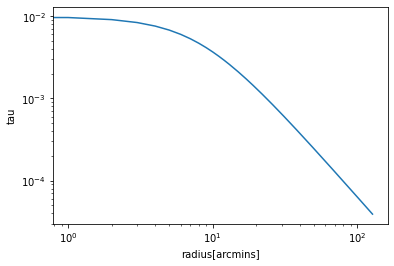

In [16]:
#tau map

tau_map = beta_map * (511/5)

plt.plot(tau_map[N//2,N//2:])

plt.ylabel('tau')
plt.xlabel('radius[arcmins]')
plt.xscale('log')
plt.yscale('log')

# Constructing different non relativistic SZ signal maps

In [17]:
noises_planck = np.array([7.73, 3.34, 4.65, 15.6, 80.6, 1920]) # reduced by factor of 10
fwhm_planck = np.array([9.68, 7.30, 5.02, 4.94, 4.83, 4.64])

noises_CORE = np.array([7.1, 5.1, 3.6, 3.8, 11.1, 45.9, 358.3])
fwhm_CORE = np.array([15.39, 12.08, 7.68, 5.23, 3.49, 2.65, 1.98])

noises_cmbs4 = np.array([1.5, 1.5, 4.8, 11.5])
fwhm_cmbs4 = np.array([2.2, 1.4, 1.0, 0.9])

# All channel noise maps of Planck, CORE and CMBS4

In [18]:
def all_channel_noise_maps( N, pix_size, noises):

    all_noises = []

    for i in range(len(noises)):
        
        all_noise = create_noise_map(N, noises[i], pix_size)
        all_noises.append(all_noise)
      
    return all_noises

planck_noise_maps = all_channel_noise_maps( N, pix_size, noises_planck)
CORE_noise_maps = all_channel_noise_maps( N, pix_size, noises_CORE)
cmbs4_noise_maps = all_channel_noise_maps( N, pix_size, noises_cmbs4)

print(np.array(planck_noise_maps).shape,'\n')
print("Var of planck noises = ", np.var(planck_noise_maps),'\n')
print("Var of CORE noises = ", np.var(CORE_noise_maps),'\n')
print("Var of CMBS4 noises = ", np.var(cmbs4_noise_maps),'\n')



(6, 256, 256) 

Var of planck noises =  9842057.455202263 

Var of CORE noises =  299318.11799527146 

Var of CMBS4 noises =  637.8484992213502 



# Gaussian velocity distribution

In [19]:

def create_gaussian_vel(realisations, sd_vel):
    
    mu = 0 
    gaussian_vel_generation = mu + np.random.randn(realisations) * sd_vel
    
    return gaussian_vel_generation

gaussian_vel = create_gaussian_vel(500,150)/(3*1e5)
#print("gaussian velocities = ",gaussian_vel,'\n')

abs_gaussian_vel = np.absolute(gaussian_vel)
#print("abs velocities = ", abs_gaussian_vel,'\n')

mean_gaussian_vel = np.mean(abs_gaussian_vel)
# print("mean = ", mean_gaussian_vel,'\n')
# print(np.var(abs_gaussian_vel),'\n')
# print(abs_gaussian_vel)


In [20]:
print("gaussian velocities = ",gaussian_vel[0:20],'\n')

print("abs velocities = ", abs_gaussian_vel[0:20],'\n')

print("mean = ", mean_gaussian_vel,'\n')


gaussian velocities =  [-4.49370480e-04 -3.43817088e-04  2.93460290e-04 -1.89104775e-04
  5.92837896e-04 -3.21301856e-04  3.90254219e-06 -1.20950339e-04
 -9.96268181e-05  1.18380054e-03 -8.28899261e-04  5.06184865e-04
  1.46958306e-04 -1.02205536e-04 -4.92927325e-04  6.32372369e-04
  4.86515203e-04  9.97934668e-05 -3.21997134e-04  7.87895103e-04] 

abs velocities =  [4.49370480e-04 3.43817088e-04 2.93460290e-04 1.89104775e-04
 5.92837896e-04 3.21301856e-04 3.90254219e-06 1.20950339e-04
 9.96268181e-05 1.18380054e-03 8.28899261e-04 5.06184865e-04
 1.46958306e-04 1.02205536e-04 4.92927325e-04 6.32372369e-04
 4.86515203e-04 9.97934668e-05 3.21997134e-04 7.87895103e-04] 

mean =  0.00038731464958721874 



# kSZ Map 

(256, 256) 



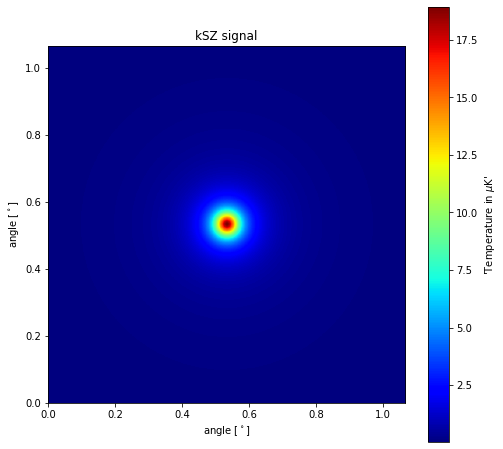

In [21]:
def calculate_ksz_map(vel, mu, t_cmb):
    
    mu = 0.7 # mu = cos (theta)
    #v = 0.001 # peculiar velocity = 300km/s / c
    t_cmb = 2.72  # in K
    
    beta_map = beta_function(N, pix_size, SZ_beta, SZ_Theta_core)
    ksz_map =  beta_map * (511/5) * vel * mu * t_cmb * 1e6 
    
    return ksz_map

ksz_map = calculate_ksz_map(0.001, mu, t_cmb)

ksz_map_gaussian_vel = calculate_ksz_map(abs_gaussian_vel[36],mu, t_cmb)

print(ksz_map.shape,'\n')



plot_map(8,8,"kSZ signal",ksz_map,"'Temperature in $\mu$K'")

#plt.savefig("/home/kaushik/Workspace/Master's Thesis/Latex/memo/images/ksz.png", dpi =150)


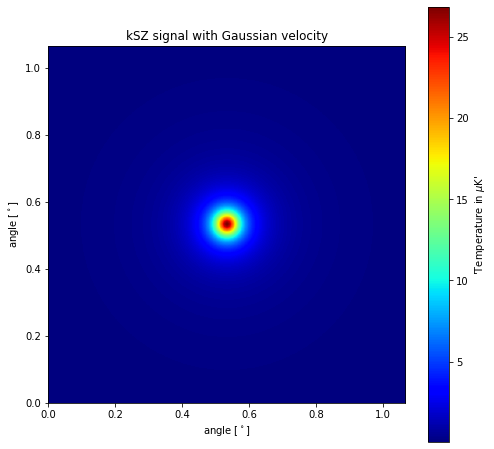

In [22]:
plot_map(8,8,"kSZ signal with Gaussian velocity",ksz_map_gaussian_vel,"'Temperature in $\mu$K'")

# kSZ maps with Gaussian distributed velocities stacked

(256, 256)


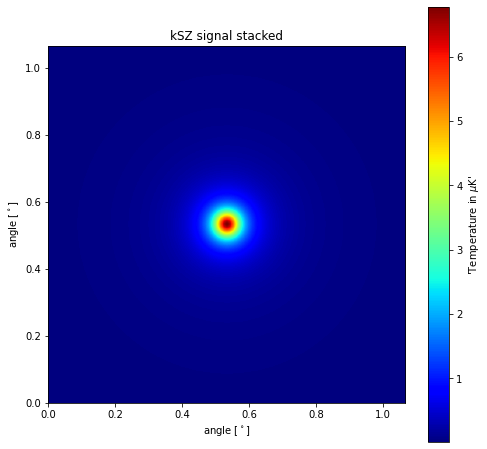

In [23]:

def ksz_signal_stacking(realisations, vel, fwhm):
    
    ksz_maps = []
    sigma_beam = fwhm/(np.sqrt(8*np.log(2)))/pix_size 

    for i in range(realisations):
    
         ksz_map_gaussian_vel = calculate_ksz_map(vel[i], mu, t_cmb)
         ksz_vel_smoothed =  ndimage.gaussian_filter(ksz_map_gaussian_vel, 
                    sigma = sigma_beam , order = 0, mode = 'reflect', truncate = 10)
         ksz_maps.append(ksz_vel_smoothed)
    
    stacked = np.sum(ksz_maps, axis = 0)/realisations
    
    return stacked

stacked_ksz_map = ksz_signal_stacking(500, abs_gaussian_vel , 1)

print(np.array(stacked_ksz_map).shape)
    
plot_map(8,8,"kSZ signal stacked",stacked_ksz_map,"'Temperature in $\mu$K'")



# CMB stacked

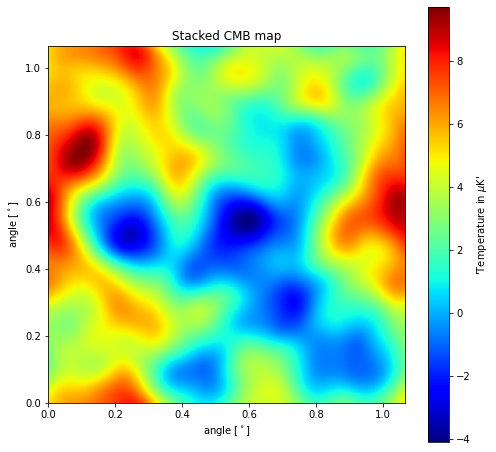

In [24]:

def cmb_stacking(no_realisations, fwhm):
    
    cmb_maps = []
    sigma_beam = fwhm/(np.sqrt(8*np.log(2)))/pix_size

    for i in range(no_realisations):
    
         cmb_temp_map = make_CMB_T_map(N,0.25,ell,DlTT)
         cmb_smoothed =  ndimage.gaussian_filter(cmb_temp_map, sigma = sigma_beam , 
                                                 order = 0, mode = 'reflect', truncate = 10)
         cmb_maps.append(cmb_smoothed)
    
    stacked_cmb = np.sum(cmb_maps, axis = 0)/no_realisations
    
    return stacked_cmb

stacked_cmb_maps = cmb_stacking(500, 1)
    
plot_map(8,8,"Stacked CMB map",stacked_cmb_maps,"'Temperature in $\mu$K'")

#plt.savefig("/home/kaushik/Workspace/Master's Thesis/Latex/memo/images/stacked_cmb.png", dpi =150)


# Stacked noise maps

In [25]:
%%time
def noise_map_stacking(no_realisations, fwhm, noises):
    
    noise_maps = []
    sigma_beam = fwhm/(np.sqrt(8*np.log(2)))/pix_size

    for i in range(len(noises)):
        
        f_noise_maps = []
        
        for j in range(no_realisations):
        
             all_noise = create_noise_map(N, noises[i], pix_size)
             all_noises_smoothed =  ndimage.gaussian_filter(all_noise, sigma = sigma_beam , 
                                                            order = 0, mode = 'reflect', truncate = 10)
             f_noise_maps.append(all_noises_smoothed)
            
        noise_maps.append(f_noise_maps)
        
    stacked_noise_maps = []
        
    for k in range(len(noises)):
    
        stacked_noise_map = np.sum(noise_maps[k], axis = 0)/no_realisations
        stacked_noise_maps.append(stacked_noise_map)
    
    return stacked_noise_maps

stacked_noise_maps_CORE =  noise_map_stacking(500, 1, noises_CORE)
stacked_noise_maps_cmbs4 = noise_map_stacking(500, 1, noises_cmbs4)

print(np.array(stacked_noise_maps_CORE).shape)
    


(7, 256, 256)
CPU times: user 1min 8s, sys: 1.87 s, total: 1min 9s
Wall time: 1min 10s


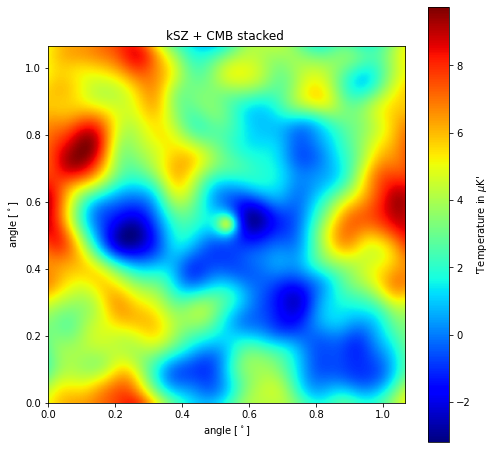

In [26]:
cmb_ksz_stacked_map = stacked_ksz_map + stacked_cmb_maps

plot_map(8,8,"kSZ + CMB stacked ",cmb_ksz_stacked_map,"'Temperature in $\mu$K'")

# Stacked kSZ + Noises + CMB at CMBS4 and CORE

       
        



In [27]:
def calculate_total_ksz_map( N, pix_size, nu, stacked_cmb, stacked_ksz, stacked_noise):
    
    total_ksz_maps = []

    for i in range(len(nu)):
        
        total_ksz_map =  stacked_ksz  + stacked_noise[i] + stacked_cmb
        total_ksz_maps.append(total_ksz_map)
        
    return total_ksz_maps


total_ksz_maps_CORE = calculate_total_ksz_map( N, pix_size, nu_CORE, stacked_cmb_maps, 
                                              stacked_ksz_map, stacked_noise_maps_CORE)

total_ksz_maps_cmbs4 = calculate_total_ksz_map( N, pix_size, nu_cmbs4, stacked_cmb_maps, 
                                               stacked_ksz_map, stacked_noise_maps_cmbs4)

print(np.array(total_ksz_maps_CORE).shape,'\n')

 
#plot_map(8,8,"kSZ + noise + CMB ",total_ksz_maps_planck[0],"Temperature in $\mu$K")


  

(7, 256, 256) 



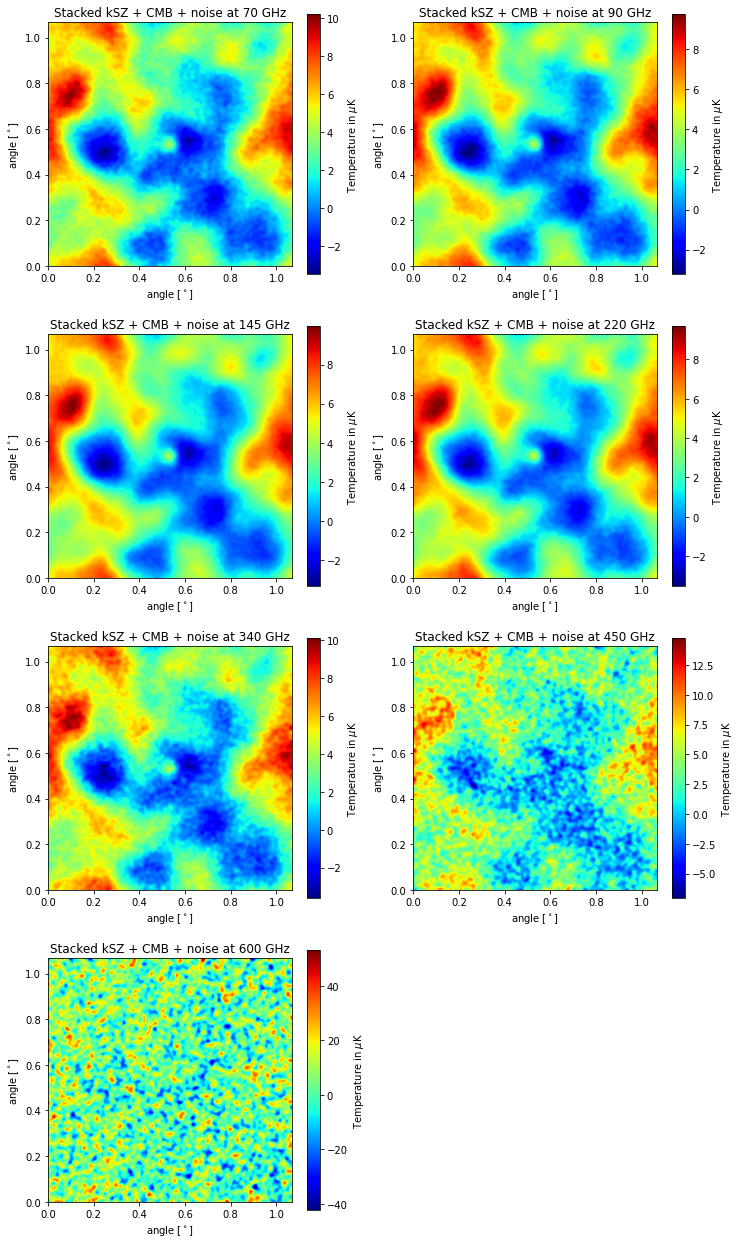

In [28]:
    
for i in range(len(nu_CORE)):
    
    plt.subplot(4, 2, i + 1)
    plot_map(12,22,f"Stacked kSZ + CMB + noise at {str(nu_CORE[i])} GHz",
             total_ksz_maps_CORE[i],"Temperature in $\mu$K")

    
#plt.savefig("/home/kaushik/Workspace/Master's Thesis/Latex/memo/images/stacked_ksz_cmb_noise_CORE.png", dpi =150)


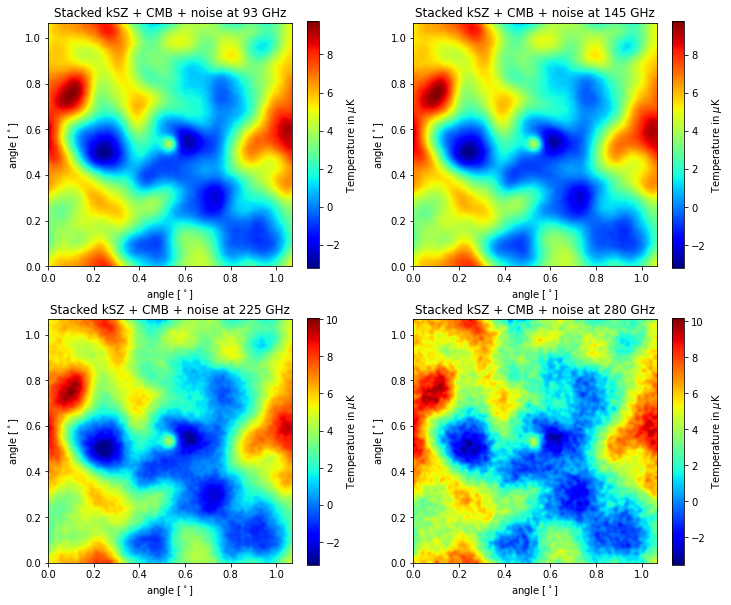

In [29]:
for i in range(len(nu_cmbs4)):
    
    plt.subplot(2, 2, i + 1)
    plot_map(12,10,f"Stacked kSZ + CMB + noise at {str(nu_cmbs4[i])} GHz",
             total_ksz_maps_cmbs4[i],"Temperature in $\mu$K")

    
plt.savefig("/home/kaushik/Workspace/MastersThesis/Latex/memo/images/stacked_ksz_cmb_noise_cmbs4.png", dpi =150)


# Smoothing stacked maps

# For smoothing each map to a common resolution

# $\sigma$ = $\frac{\sqrt{(FWHM_{\text{lowest freq channel}})^2 - (FWHM_{\text{other freq channel}}})^2}{\sqrt{8log2}  \times \text{pix size}}$

fwhm_CORE = (15.39, 12.08, 7.68, 5.23, 3.49, 2.65, 1.98) arcmins

# $\sigma_{\text{CORE}}$ = $\frac{\sqrt{15.39^2 - FWHM[i\neq 0]^2}}{\sqrt{8log2}  \times \text{pix size}}$

fwhm_cmbs4 = (2.2, 1.4, 1.0, 0.9) arcmins

# $\sigma_{\text{CMB S4}}$ = $\frac{\sqrt{2.2^2 - FWHM[i\neq 0]^2}}{\sqrt{8log2}  \times \text{pix size}}$

In [30]:
# Sigma beam at each CORE and CMBS4 frequencies

sigma_beam_each_CORE = []

for i in range((len(fwhm_CORE))):
    
    if i == 0:
        sigma_CORE = (np.sqrt(fwhm_CORE[0]**2))/(np.sqrt(8*np.log(2)))/pix_size
        sigma_beam_each_CORE.append(sigma_CORE)
    else:
        sigma_CORE = (np.sqrt(fwhm_CORE[0]**2 - fwhm_CORE[i]**2))/(np.sqrt(8*np.log(2)))/pix_size
        sigma_beam_each_CORE.append(sigma_CORE)
        
print("sigma beam at CORE = ",np.array(sigma_beam_each_CORE)*pix_size,'arcmins','\n')

sigma_beam_each_cmbs4 = []

for i in range((len(fwhm_cmbs4))):
    
    if i == 0:
        sigma_cmbs4 = np.sqrt(fwhm_cmbs4[0]**2)/(np.sqrt(8*np.log(2)))/pix_size
        sigma_beam_each_cmbs4.append(sigma_cmbs4)
    else:
        sigma_cmbs4 = (np.sqrt(fwhm_cmbs4[0]**2 - fwhm_cmbs4[i]**2))/(np.sqrt(8*np.log(2)))/pix_size
        sigma_beam_each_cmbs4.append(sigma_cmbs4)
        
print("sigma beam at CMBS4 = ",np.array(sigma_beam_each_cmbs4)*pix_size,'arcmins','\n')

sigma beam at CORE =  [6.53553125 4.04935267 5.66360899 6.1465789  6.36526885 6.43791527
 6.48121717] arcmins 

sigma beam at CMBS4 =  [0.93425398 0.72067345 0.83216202 0.85250081] arcmins 



In [31]:
def calculate_total_ksz_each_smoothed( N, pix_size, fwhm, total_maps, sigma_beam):
    
    total_ksz_each_smoothed = []

    for i in range(len(fwhm)):
    
        ksz_each_smoothed = ndimage.gaussian_filter(total_maps[i], 
                                        sigma = sigma_beam[i], order = 0, mode = 'reflect', truncate = 10)
        total_ksz_each_smoothed.append(ksz_each_smoothed)
        
    return total_ksz_each_smoothed

total_ksz_maps_each_smoothed_CORE = calculate_total_ksz_each_smoothed( N, pix_size, fwhm_CORE, 
                                                            total_ksz_maps_CORE, sigma_beam_each_CORE)

total_ksz_maps_each_smoothed_cmbs4 = calculate_total_ksz_each_smoothed( N, pix_size, fwhm_cmbs4, 
                                                            total_ksz_maps_cmbs4, sigma_beam_each_cmbs4)

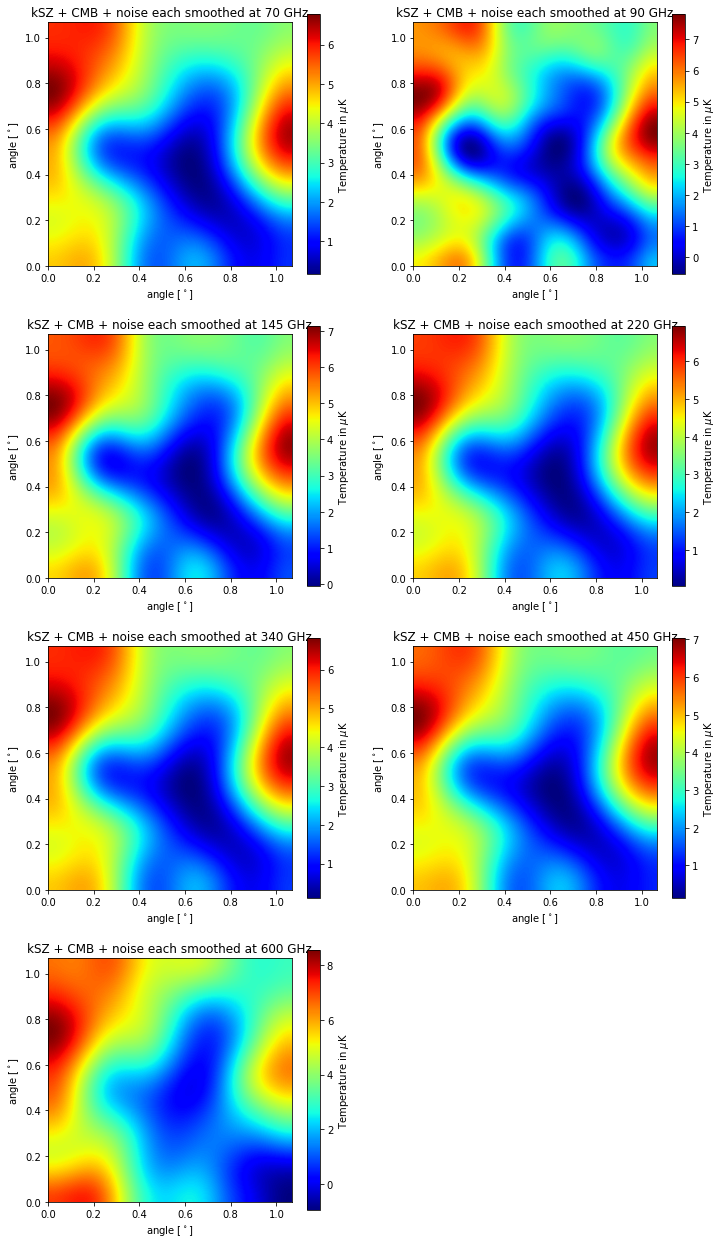

In [32]:
for i in range(len(nu_CORE)):
    
    plt.subplot(4, 2, i + 1)
    plot_map(12,22,f"kSZ + CMB + noise each smoothed at {str(nu_CORE[i])} GHz",
             total_ksz_maps_each_smoothed_CORE[i],"Temperature in $\mu$K")

plt.savefig("/home/kaushik/Workspace/MastersThesis/Latex/memo/images/ksz_cmb_noise_smoothed_CORE.png", dpi =150)    
    

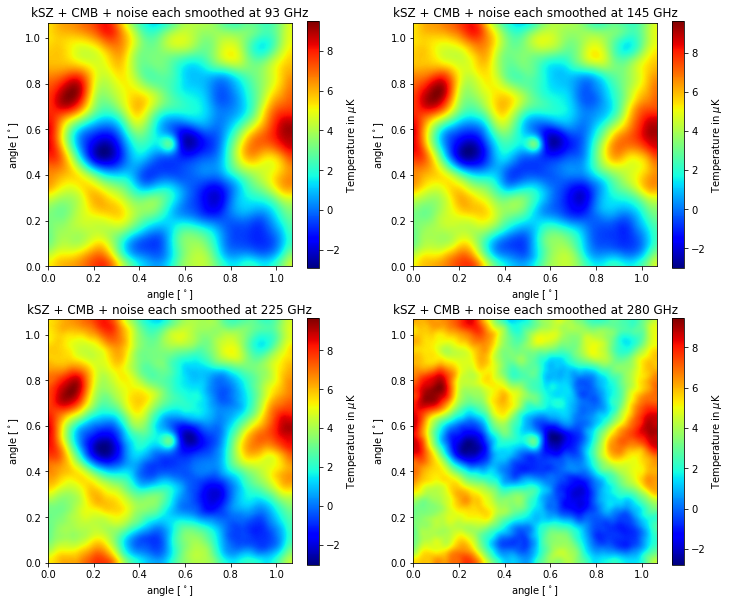

In [33]:
for i in range(len(nu_cmbs4)):
    
    plt.subplot(2, 2, i + 1)
    plot_map(12,10,f"kSZ + CMB + noise each smoothed at {str(nu_cmbs4[i])} GHz",
             total_ksz_maps_each_smoothed_cmbs4[i],"Temperature in $\mu$K")

plt.savefig("/home/kaushik/Workspace/MastersThesis/Latex/memo/images/ksz_cmb_noise_smoothed_cmbs4.png", dpi =150)    
    

(6, 256, 256) 

6135.720986250717


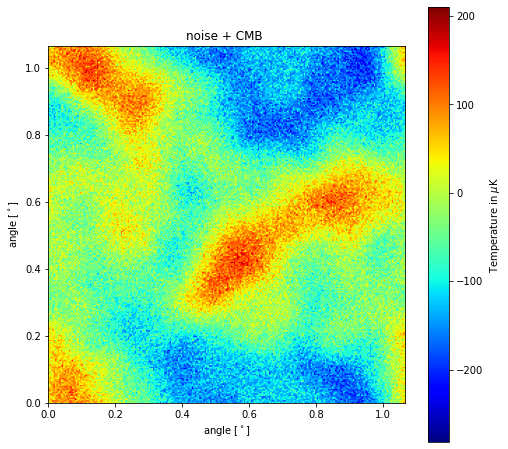

In [34]:
def calculate_cmb_noise_map( N, pix_size, nu, noise_map):
    
    cmb_noise_maps = []

    for i in range(len(nu)):

        cmb_noise_map = cmb_temp_map + noise_map[i] 
        cmb_noise_maps.append(cmb_noise_map)
        
    return cmb_noise_maps

cmb_noise_maps_planck = calculate_cmb_noise_map( N, pix_size, nu_planck, planck_noise_maps)
cmb_noise_maps_CORE = calculate_cmb_noise_map( N, pix_size, nu_CORE, CORE_noise_maps)
print(np.array(cmb_noise_maps_planck).shape,'\n')
print(np.var(cmb_noise_maps_planck[0]))

plot_map(8,8,"noise + CMB ",cmb_noise_maps_planck[0],"Temperature in $\mu$K")


# tSZ Map at different HFI and CORE

In [35]:
def calculate_tsz_map(nu):
    
    h = 6.62 * 1e-27  # in  cm^2 g s^-1
    k = 1.38 * 1e-16  # in erg K^−1
    c = 2.99 * 1e10  # in cm s^-1
    y = 9.784735812133073e-05 #1e-4
    t_cmb = 2.72  # in K
    
    tsz_maps = []
    
    for i in range(len(nu)):
        
        x = (h * nu[i] * 1e9) / (k * t_cmb)
        F = x * (1 / np.tanh(x / 2))
        tSZ_spec = (F - 4)  
    
        beta_map = beta_function(N, pix_size, SZ_beta, SZ_Theta_core)
        tsz_map = tSZ_spec * t_cmb * 1e6 * beta_map
        tsz_maps.append(tsz_map)
    
    return tsz_maps

tsz_maps_planck = calculate_tsz_map(nu_planck)
tsz_maps_CORE = calculate_tsz_map(nu_CORE)

print(np.array(tsz_maps_CORE).shape)


(7, 256, 256)


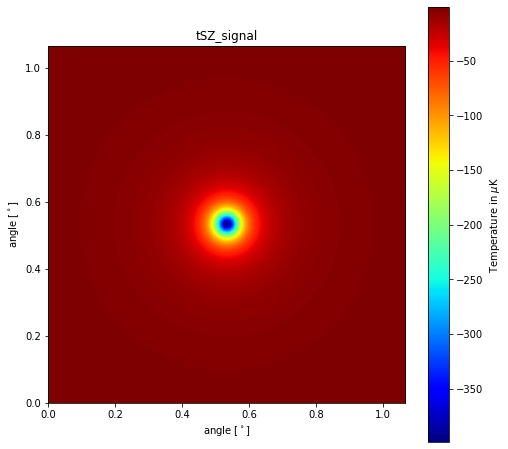

In [36]:
plot_map(8,8,"tSZ_signal",tsz_maps_planck[0],"Temperature in $\mu$K")

# tSZ + Noise + CMB at HFI and CORE

In [37]:
# reduced noise

def calculate_total_tsz_map_planck( N, pix_size, nu, noise_map, cmb_map):
    
    total_tsz_maps = []

    for i in range(len(nu)):
        
        total_tsz_map = tsz_maps_planck[i] + cmb_map + noise_map[i]
        total_tsz_maps.append(total_tsz_map)
        
    return(total_tsz_maps)


def calculate_total_tsz_map_CORE( N, pix_size, nu, noise_map, cmb_map):
    
    total_tsz_maps = []

    for i in range(len(nu)):

        total_tsz_map =  tsz_maps_CORE[i]  + cmb_map + noise_map[i]
        total_tsz_maps.append(total_tsz_map)
        
    return(total_tsz_maps)

total_tsz_maps_planck = calculate_total_tsz_map_planck( N, pix_size, nu_planck, planck_noise_maps, cmb_temp_map)
total_tsz_maps_CORE =  calculate_total_tsz_map_CORE( N, pix_size, nu_CORE, CORE_noise_maps, cmb_temp_map)

print(np.var(total_tsz_maps_CORE),'\n')
print(np.array(total_tsz_maps_planck).shape,'\n')
print(np.array(total_tsz_maps_CORE).shape,'\n')


306826.55696250766 

(6, 256, 256) 

(7, 256, 256) 



# Defining ILC function

In [38]:
def ilc_run(image,a,factor):

    nf = np.array(image).shape[0]
    npix = np.array(image).shape[1]
    
    image_reshaped = np.array(image).reshape(nf, npix*npix)
    cov_image = np.cov(image_reshaped)
    #print(cov_image,'\n')
    #plt.imshow(cov_image, cmap = 'jet', origin = 'lower')
    #plt.colorbar()
    #plt.gcf().set_size_inches(10,10)
    cov_inverse = np.linalg.inv(cov_image)

    
    #weights = (cov_inverse @  a.T) / (a.T @ cov_inverse @ a)
    weights = (a.T @ cov_inverse) / (a.T @ cov_inverse @ a)

    print("weights =",weights,'\n')
    print("sum weights =",np.sum(weights * a),'\n')
          
    reconstructed_map = np.zeros(image[0].shape)
    
    for i in range(nf):
    
        reconstructed_map = reconstructed_map +  (weights[i] * image[i])  / factor 
        #plt.subplot(4, 2, i + 1)
        #plot_map(12,22,f"weight temperature{str(nu_CORE[i])} GHz",reconstructed_map,"tau")
        
    return reconstructed_map


In [39]:
def noise_ilc(image_1, image_2, a, factor):


    nf = np.array(image_1).shape[0]
    npix = np.array(image_1).shape[1]
    
    image_reshaped = np.array(image_1).reshape(nf, npix*npix)
    cov_image = np.cov(image_reshaped)
    #print(cov_image,'\n')
    #plt.imshow(cov_image, cmap = 'jet', origin = 'lower')
    #plt.colorbar()
    #plt.gcf().set_size_inches(10,10)
    cov_inverse = np.linalg.inv(cov_image)
    weights = (a.T @ cov_inverse) / (a.T @ cov_inverse @ a)
    #weights = (cov_inverse @ a.T ) / (a.T @ cov_inverse @ a)
    
    #(cov_inverse @ a)/(np.transpose(a) @ cov_inverse @ a)
    #print("weights =",weights,'\n')
    #print("sum weights =",np.sum(weights * a ),'\n')
          
    reconstructed_map = np.zeros(image_2[0].shape)
    
    for i in range(nf):
    
        reconstructed_map = reconstructed_map +  (weights[i] * image_2[i])  / factor
    
    return reconstructed_map


In [40]:
def cmb_residual_ilc(image_1, image_2, a, factor):


    nf = np.array(image_1).shape[0]
    npix = np.array(image_1).shape[1]
    
    image_reshaped = np.array(image_1).reshape(nf, npix*npix)
    cov_image = np.cov(image_reshaped)
    #print(cov_image,'\n')
    #plt.imshow(cov_image, cmap = 'jet', origin = 'lower')
    #plt.colorbar()
    #plt.gcf().set_size_inches(10,10)
    cov_inverse = np.linalg.inv(cov_image)
    
    weights = (cov_inverse @ a.T ) / (a.T @ cov_inverse @ a)
    #print("weights =",weights,'\n')
    #print("sum weights =",np.sum(weights * a ),'\n')
          
    reconstructed_map = np.zeros(image_2.shape)
    
    for i in range(nf):
    
        reconstructed_map = reconstructed_map +  (weights[i] * image_2)  / factor
    
    return reconstructed_map


# Implementing ILC for extracting desired signals from non relativistic SZ terms

# Extracting CMB from CMB + noise

weights = [ 9.92401241e-02  5.63191027e-01  3.16958419e-01  1.94592103e-02
  1.15555303e-03 -4.33294023e-06] 

sum weights = 0.9999999999999999 

var of noise map =  102.8030145736157 

var of estimated signal =  5263.061639055344 



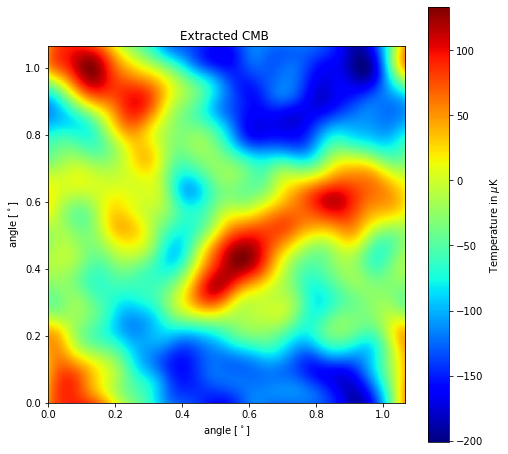

In [41]:
a_cmb = np.array([1,1,1,1,1,1])

extracted_cmb_planck = ilc_run(cmb_noise_maps_planck, a_cmb, factor = 1)
n_map_planck = noise_ilc(cmb_noise_maps_planck, planck_noise_maps, a_cmb, factor = 1)
cmb_signal =  extracted_cmb_planck - n_map_planck

print("var of noise map = ", np.var(n_map_planck),'\n')
print("var of estimated signal = ", np.var(extracted_cmb_planck),'\n')

plot_map(8,8,"Extracted CMB ",cmb_signal,"Temperature in $\mu$K")


# Extracting the tau signal from ksz + CMB + noises

weights = [ 32.17626009   3.07431444  -7.13150338  -9.9665754  -12.5863666
  -4.16977564  -0.39635352] 

sum weights = 0.9999999999999993 

input tau =  [0.00993796 0.00963907 0.00909218 0.00837906 0.00758578 0.00678305
 0.00601876 0.00531949 0.00469596 0.00414886] 

extracted tau =  [0.00324078 0.00323316 0.00322306 0.00321051 0.00319558 0.00317839
 0.00315911 0.00313793 0.00311508 0.00309081] 



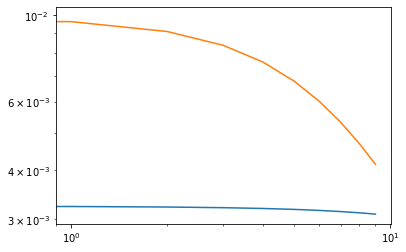

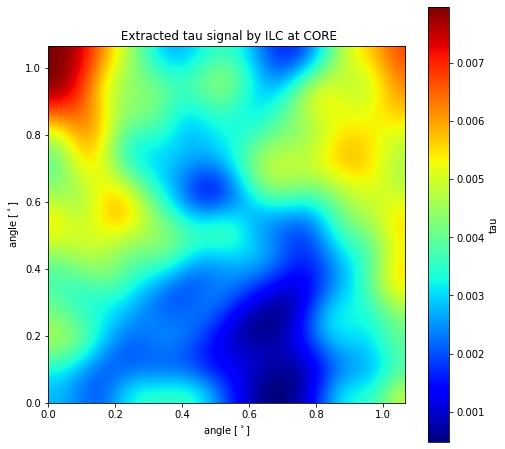

In [42]:
#CORE

a_ksz_CORE = np.ones(7, dtype = int)#np.array ([1, 1, 1, 1, 1, 1, 1])

extracted_tau_signal_ksz_smoothed_CORE = ilc_run(total_ksz_maps_each_smoothed_CORE, a_ksz_CORE,
                                                 factor = mean_gaussian_vel * mu * t_cmb * 1e6)

print("input tau = ", tau_map[N//2,N//2:N//2 + 10],'\n')
print("extracted tau = ", extracted_tau_signal_ksz_smoothed_CORE[N//2,N//2:N//2 + 10],'\n')

plt.plot(extracted_tau_signal_ksz_smoothed_CORE[N//2,N//2:N//2 + 10])
plt.plot(tau_map[N//2,N//2:N//2 + 10] )
plt.xscale('log')
plt.yscale('log')
plt.show()

plot_map(8,8," Extracted tau signal by ILC at CORE",extracted_tau_signal_ksz_smoothed_CORE,"tau")

plt.savefig("/home/kaushik/Workspace/MastersThesis/Latex/memo/images/ilc_ksz_smoothed_CORE.png", dpi =150)


weights = [ 22.05658076 -21.57454461   0.03430605   0.48365781] 

sum weights = 0.9999999999999973 

input tau =  [0.00993796 0.00963907 0.00909218 0.00837906 0.00758578 0.00678305
 0.00601876 0.00531949 0.00469596 0.00414886] 

extracted tau =  [-0.01008863 -0.00946655 -0.00837099 -0.00694467 -0.00535868 -0.00377952
 -0.00234236 -0.00113553 -0.00019696  0.00047927] 



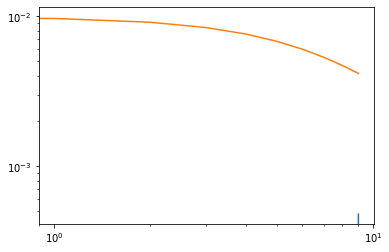

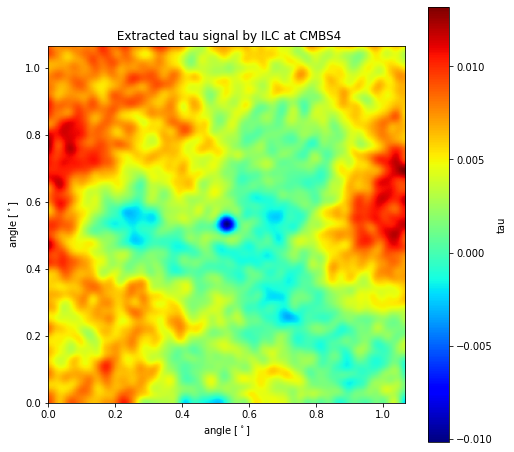

In [43]:
#CMBS4

a_ksz_cmbs4 = np.ones(4, dtype = int)#np.array ([1, 1, 1, 1])

extracted_tau_signal_ksz_smoothed_cmbs4 = ilc_run(total_ksz_maps_each_smoothed_cmbs4, a_ksz_cmbs4, 
                                                  factor = mean_gaussian_vel * mu * t_cmb * 1e6)

print("input tau = ", tau_map[N//2,N//2:N//2 + 10],'\n')
print("extracted tau = ", extracted_tau_signal_ksz_smoothed_cmbs4[N//2,N//2:N//2 + 10],'\n')

plt.plot(extracted_tau_signal_ksz_smoothed_cmbs4[N//2,N//2:N//2 + 10])
plt.plot(tau_map[N//2,N//2:N//2 + 10] )
plt.xscale('log')
plt.yscale('log')
plt.show()

plot_map(8,8," Extracted tau signal by ILC at CMBS4",extracted_tau_signal_ksz_smoothed_cmbs4,"tau")

plt.savefig("/home/kaushik/Workspace/MastersThesis/Latex/memo/images/ilc_ksz_smoothed_cmbs4.png", dpi =150)

# Extracting the y signal from the tsz + CMB + noises

weights = [-1.57401551e-01 -3.83491576e-01  3.38409409e-01  1.35328556e-01
  1.08227330e-02  4.66322473e-05] 

sum weights = 1.0 

input y =  [9.72403101e-05 9.43157895e-05 8.89645390e-05 8.19869281e-05
 7.42248521e-05 6.63703704e-05 5.88920188e-05 5.20497925e-05
 4.59487179e-05 4.05954693e-05] 

extracted y signal by ilc =  [9.46249043e-05 8.90576617e-05 8.71269314e-05 8.32303052e-05
 7.89966903e-05 6.90600280e-05 5.84832355e-05 5.64927277e-05
 4.48404282e-05 4.63145402e-05] 



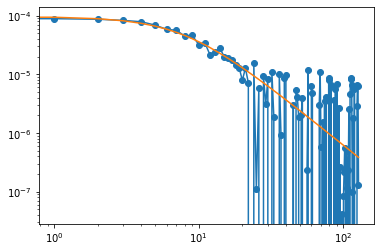

In [44]:
#Planck

a_tsz_planck = np.array (tSZ_spec_planck)

extracted_y_signal_tsz_planck = ilc_run(total_tsz_maps_planck, a_tsz_planck, factor = t_cmb * 1e6  )

plt.plot(extracted_y_signal_tsz_planck[N//2,N//2:],'-o')
plt.plot(beta_map[N//2,N//2:])

plt.xscale('log')
plt.yscale('log')

print("input y = ",(beta_map[N//2,N//2:N//2 + 10]),'\n')
print("extracted y signal by ilc = ",extracted_y_signal_tsz_planck[N//2,N//2:N//2 + 10],'\n')


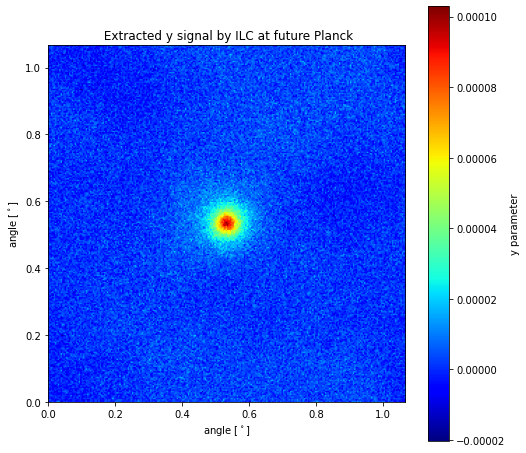

In [45]:
plot_map(8,8," Extracted y signal by ILC at future Planck",extracted_y_signal_tsz_planck,"y parameter")

#plt.savefig("/home/kaushik/Workspace/Master's Thesis/Codes_jupyter_notebook/Maps/y_signal_tsz_planck.png")

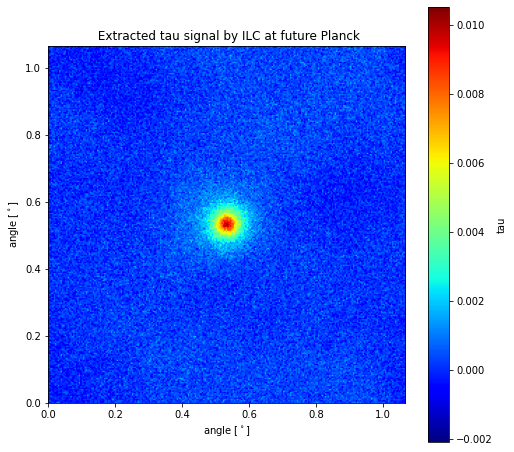

In [46]:
# tau signal planck

extracted_tau_signal_tsz_planck = extracted_y_signal_tsz_planck * (511/5)

plot_map(8,8," Extracted tau signal by ILC at future Planck",extracted_tau_signal_tsz_planck,"tau")

#plt.savefig("/home/kaushik/Workspace/Master's Thesis/Codes_jupyter_notebook/Maps/tau_signal_tsz_planck.png")


weights = [-0.12087524 -0.20908738 -0.14061281  0.28922537  0.12272639  0.01226724
  0.00034238] 

sum weights = 0.9999999999999999 

input y =  [9.72403101e-05 9.43157895e-05 8.89645390e-05 8.19869281e-05
 7.42248521e-05 6.63703704e-05 5.88920188e-05 5.20497925e-05
 4.59487179e-05 4.05954693e-05] 

extracted y signal by ilc =  [9.94359502e-05 1.00278285e-04 8.43984519e-05 8.00679881e-05
 7.14741342e-05 7.11886442e-05 5.26128477e-05 5.01816785e-05
 4.23513115e-05 4.42786530e-05] 



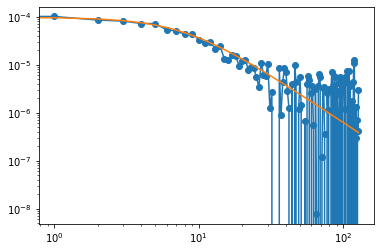

In [47]:
#CORE

a_tsz_CORE = np.array(tSZ_spec_CORE)

extracted_y_signal_tsz_CORE = ilc_run(total_tsz_maps_CORE, a_tsz_CORE, factor = t_cmb * 1e6  )

plt.plot(extracted_y_signal_tsz_CORE[N//2,N//2:],'-o')
plt.plot(beta_map[N//2,N//2:])

plt.xscale('log')
plt.yscale('log')

print("input y = ",(beta_map[N//2,N//2:N//2 + 10]),'\n')
print("extracted y signal by ilc = ",extracted_y_signal_tsz_CORE[N//2,N//2:N//2 + 10],'\n')

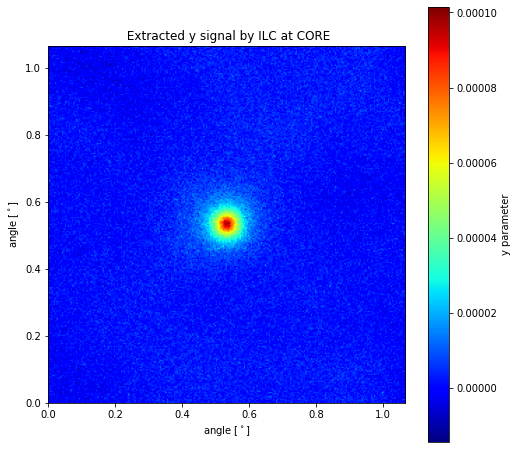

In [49]:
plot_map(8,8," Extracted y signal by ILC at CORE",extracted_y_signal_tsz_CORE,"y parameter")

#plt.savefig("/home/kaushik/Workspace/Master's Thesis/Codes_jupyter_notebook/Maps/y_signal_tsz_CORE.png", dpi = 150)

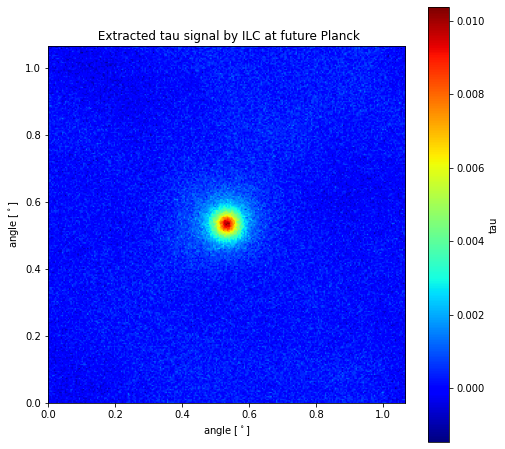

In [50]:
#tau signal CORE

extracted_tau_signal_tsz_CORE = extracted_y_signal_tsz_CORE * (511/5)

plot_map(8,8," Extracted tau signal by ILC at future Planck",extracted_tau_signal_tsz_CORE,"tau")

#plt.savefig("/home/kaushik/Workspace/Master's Thesis/Codes_jupyter_notebook/Maps/tau_signal_tsz_CORE.png")


# Defining radial profile function

In [51]:
def dist(image, pix_size):
    
    nx, ny = image.shape[0], image.shape[1]
    center = (nx//2, ny//2)
    YY, XX = np.indices((nx,ny))
    R = np.sqrt((XX-center[0])**2 + (YY-center[1])**2) * pix_size

    return(R)

R = dist(extracted_tau_signal_ksz_smoothed_cmbs4,0.25)
print(np.max(R),'\n')

def radial_profile(image, n_bins, pix_size):
    
    R = dist(image, pix_size)
    profiles = np.zeros((2,n_bins))
    bin_size = np.linspace(0,np.max(R),n_bins+1)

    for i in np.arange(n_bins):
        
        mask = (R >= bin_size[i]) & (R < bin_size[i+1])
        signals = image[mask]
        profiles[0,i] = np.mean(signals)
        profiles[1,i] = np.std(signals)
         
    return profiles


def radial_array(n_bins):
    
    rad_arr = np.linspace(0,np.max(R),n_bins+1) 
    
    return rad_arr
bin_size = np.linspace(0,np.max(R),30+1)
print(bin_size[1]-bin_size[0])

45.254833995939045 

1.5084944665313016


# Noise residual bin to bin covariance function¶

In [52]:
def bin_to_bin_covariance(residual_noise_realisations, no_of_realisations, n_bins):
    
    nx, ny = np.array(residual_noise_realisations).shape[1], np.array(residual_noise_realisations).shape[2]
    center = (nx//2, ny//2)
    YY, XX = np.indices((nx,ny))
    R = np.sqrt((XX-center[0])**2 + (YY-center[1])**2) * 0.25

    profiles = np.zeros((n_bins,no_of_realisations))
    bin_width = np.linspace(0,np.max(R),n_bins+1)

    for k in np.arange(no_of_realisations):
        
        each_residual_map = np.copy(residual_noise_realisations[k])
       
        for j in range(n_bins):
    
            mask = (R >= bin_width[j]) & (R < bin_width[j+1])
            signals = each_residual_map[mask]
            profiles[j,k] = np.mean(signals)
            

    bin_cov = np.cov(profiles)
    
    return bin_cov

# Extracting residuals from ksz + cmb + noise map

In [53]:
#noise residuals
#Planck

a_ksz_planck = np.array ([1, 1, 1, 1, 1, 1])
residual_noise_map_ksz_planck = noise_ilc(total_ksz_maps_planck, planck_noise_maps, a_ksz_planck, factor = v * mu * t_cmb * 1e6)

print(np.mean(residual_noise_map_ksz_planck),'\n')
plt.plot(residual_noise_map_ksz_planck[100,:])

#CORE

a_ksz_CORE = np.array ([1, 1, 1, 1, 1, 1, 1])
residual_noise_map_ksz_CORE = noise_ilc(total_ksz_maps_CORE, CORE_noise_maps, a_ksz_CORE, factor = v * mu * t_cmb * 1e6)

print(np.mean(residual_noise_map_ksz_CORE),'\n')
plt.plot(residual_noise_map_ksz_CORE[100,:])

#CMB residuals
#Planck

residual_cmb_ksz_planck = cmb_residual_ilc(total_ksz_maps_planck, cmb_temp_map, a_ksz_planck, factor = v * mu * t_cmb * 1e6)
print(residual_cmb_ksz_planck.shape)

#CORE

residual_cmb_ksz_CORE = cmb_residual_ilc(total_ksz_maps_CORE, cmb_temp_map, a_ksz_CORE, factor = v * mu * t_cmb * 1e6)
print(residual_cmb_ksz_CORE.shape)

#total residuals
#Planck
total_residual_map_ksz_planck = residual_noise_map_ksz_planck + residual_cmb_ksz_planck
#CORE
total_residual_map_ksz_CORE = residual_noise_map_ksz_CORE + residual_cmb_ksz_CORE


NameError: name 'total_ksz_maps_planck' is not defined

# Extracting residuals from tsz + cmb +noise maps

In [ ]:
#noise residuals
#Planck

a_tsz_planck = np.array (tSZ_spec_planck )
residual_noise_map_tsz_planck = noise_ilc(total_tsz_maps_planck, planck_noise_maps, a_tsz_planck, factor = t_cmb * 1e6 )

plt.plot(residual_noise_map_tsz_planck[100,:])

#CORE

a_tsz_CORE = np.array (tSZ_spec_CORE)
residual_noise_map_tsz_CORE = noise_ilc(total_tsz_maps_CORE, CORE_noise_maps, a_tsz_CORE, factor = t_cmb * 1e6)

plt.plot(residual_noise_map_tsz_CORE[100,:])


#CMB residuals
#Planck

residual_cmb_tsz_planck =  cmb_residual_ilc(total_tsz_maps_planck, cmb_temp_map, a_tsz_planck, factor = t_cmb * 1e6)
print(residual_cmb_tsz_planck.shape)

#CORE

residual_cmb_tsz_CORE =  cmb_residual_ilc(total_tsz_maps_CORE, cmb_temp_map, a_tsz_CORE, factor = t_cmb * 1e6)
print(residual_cmb_tsz_CORE.shape)


#Total residuals

total_residual_map_tsz_planck = residual_noise_map_tsz_planck + residual_cmb_tsz_planck

total_residual_map_tsz_CCORE = residual_noise_map_tsz_CORE + residual_cmb_tsz_CORE


# Pixel histograms

# kSZ

In [ ]:
#Planck

plt.gcf().set_size_inches(8,8)

plt.title("Pixel histogram of residual CMB and noise ksz future Planck")
plt.ylabel("Pixel Count")
plt.xlabel("Residual cmb and noise residual values")

plt.hist(residual_cmb_ksz_planck.flatten(), bins = 20,  histtype = 'step', label = 'CMB residual')
plt.hist(residual_noise_map_ksz_planck.flatten(), bins = 20, histtype = 'step', label = 'Noise residual')
plt.legend()
plt.savefig("/home/kaushik/Workspace/Master's Thesis/Codes_jupyter_notebook/Plots/hist_kSZ_Planck.png", dpi = 150)

In [ ]:
#CORE

plt.gcf().set_size_inches(8,8)

plt.title("Pixel histogram of residual CMB and noise ksz future CORE")
plt.ylabel("Pixel Count")
plt.xlabel("Residual cmb and noise values ")

plt.hist(residual_cmb_ksz_CORE.flatten(), bins = 20,  histtype = 'step', label = 'CMB residual')
plt.hist(residual_noise_map_ksz_CORE.flatten(), bins = 20, histtype = 'step', label = 'Noise residual')
plt.legend()
plt.savefig("/home/kaushik/Workspace/Master's Thesis/Codes_jupyter_notebook/Plots/hist_kSZ_CORE.png", dpi = 150)

# tSZ

In [ ]:
#Planck
print(np.min(residual_cmb_tsz_planck))
plt.gcf().set_size_inches(8,8)

plt.title("Pixel histogram of residual CMB and noise tsz future Planck")
plt.ylabel("Pixel Count")
plt.xlabel("Residual cmb and noise values ")

plt.hist(residual_cmb_tsz_planck.flatten() * (511/5), bins = 30,  histtype = 'step', label = 'CMB residual')
plt.hist(residual_noise_map_tsz_planck.flatten() * (511/5), bins = 30, histtype = 'step', label = 'Noise residual')
plt.legend()
plt.savefig("/home/kaushik/Workspace/Master's Thesis/Codes_jupyter_notebook/Plots/hist_tSZ_Planck.png", dpi = 150)

In [ ]:
#CORE
hist, bin_edges = np.histogram(residual_cmb_tsz_CORE, bins= 10)
bin_centres = (bin_edges[0:-1] + bin_edges[1:])/2

print("pixel count = ", hist , '\n')
print("bins = ", bin_edges,'\n')
print("bin_centres = ",bin_centres,'\n')

plt.gcf().set_size_inches(8,8)

plt.title("Pixel histogram of residual CMB and noise tsz CORE")
plt.ylabel("Pixel Count")
plt.xlabel("Residual cmb and noise values ")

plt.hist(residual_cmb_tsz_CORE.flatten() * (511/5), bins = 30,  histtype = 'step', label = 'CMB residual')
plt.hist(residual_noise_map_tsz_CORE.flatten() * (511/5), bins = 30, histtype = 'step', label = 'Noise residual')
plt.legend()
plt.savefig("/home/kaushik/Workspace/Master's Thesis/Codes_jupyter_notebook/Plots/hist_tSZ_CORE.png", dpi = 150)

In [ ]:
Stop_1

# Plots of different non relativistic sz signal profiles

# Error by noise and CMB realisations ksz

In [ ]:
def error_realisations(no_of_realisations, no_of_stacking, noises, total_map, a, factor):

    error_realisations = []
    noise_realisations = []
    cmb_realisations = []
  
    for t in range(no_of_realisations):
   
        stacked_noise_maps =  noise_map_stacking(no_of_stacking, 1, noises)
        stacked_cmb_map = cmb_stacking(no_of_stacking, 1)
    
        total_maps = total_map
        
        residual_noise_map = noise_ilc(total_maps, stacked_noise_maps, a, factor)
        noise_realisations.append(residual_noise_map)
    
        residual_cmb_map = cmb_residual_ilc(total_maps, stacked_cmb_map, a, factor)
        cmb_realisations.append(residual_cmb_map)
    
        total_residual_map = residual_noise_map + residual_cmb_map
        error_realisations.append(total_residual_map)
        
    return error_realisations, noise_realisations

#def error_covariance_matrix(error_realisations, n_bins, nfr):
    
#     error_covariance = bin_to_bin_covariance(error_realisations, nfr, n_bins)
#     error_variance = np.diagonal(error_covariance)
#     sd_error = np.sqrt(error_variance)
    
#     return error_covariance

# kSZ 

In [ ]:
#CORE

factor_ksz = mean_gaussian_vel * t_cmb * 1e6

error_realns_ksz_CORE, noise_realns_ksz_CORE = error_realisations(500, 100, noises_CORE, total_ksz_maps_each_smoothed_CORE, a_ksz_CORE, factor_ksz)

print(np.array(error_realns_ksz_CORE).shape,'\n')

In [ ]:
n_bins = 20

error_covariance_ksz_CORE = bin_to_bin_covariance(error_realns_ksz_CORE, 500, n_bins)
error_variance_ksz_CORE = np.diagonal(error_covariance_ksz_CORE)
sd_error_ksz_CORE = np.sqrt(error_variance_ksz_CORE)

plot_map(8,8," Error covariance matrix ksz CORE ",error_covariance_ksz_CORE,"residuals")

# SNR of central bin ksz CORE

In [ ]:
n_bins = 20

noise_covariance_ksz_CORE = bin_to_bin_covariance(noise_realns_ksz_CORE, 500, n_bins)
noise_variance_ksz_CORE = np.diagonal(noise_covariance_ksz_CORE)
sd_noise_ksz_CORE = np.sqrt(noise_variance_ksz_CORE)

plot_map(8,8," Noise covariance matrix ksz CORE ",noise_covariance_ksz_CORE,"residuals")



# SNR kSZ CORE

In [ ]:
mean_signal_ksz_CB_CORE = radial_profile(extracted_tau_signal_ksz_smoothed_CORE, n_bins, 0.25)[0,0]
sd_noise_ksz_CB_CORE = sd_noise_ksz_CORE[0]
SNR_ksz_CORE = mean_signal_ksz_CB_CORE / sd_noise_ksz_CB_CORE
SNR_theoretical_ksz_CORE = tau/sd_noise_ksz_CB_CORE

binned_input_tau_CB = radial_profile(tau_map, n_bins, 0.25)[0,0]
binned_SNR_theoretical_ksz_CORE = binned_input_tau_CB/sd_noise_ksz_CB_CORE

print("Theoretical SNR of kSZ CORE = ", SNR_theoretical_ksz_CORE,'\n')
print("SNR of central bin kSZ CORE = ", SNR_ksz_CORE,'\n')
print("Signal mean of central bin kSZ CORE = ", mean_signal_ksz_CB_CORE,'\n')
print("Noise sd of central bin kSZ CORE = ", sd_noise_ksz_CB_CORE,'\n')
print("tau peak = ",tau ,'\n')
print("input tau central bin = ", binned_input_tau_CB,'\n')
print("Binned theoretical SNR of kSZ CORE = ", binned_SNR_theoretical_ksz_CORE,'\n')
print("Average noise level kSZ CORE = ", np.mean(sd_noise_ksz_CORE [:20]),'\n')
print("Average noise level kSZ CORE in mu_K = ", np.mean(sd_noise_ksz_CORE [:20]) * t_cmb * 1e6,'\n')

In [ ]:
#CMBS4

factor_ksz = mean_gaussian_vel * t_cmb * 1e6

error_realns_ksz_cmbs4, noise_realns_ksz_cmbs4 = error_realisations(500, 100, noises_cmbs4, total_ksz_maps_each_smoothed_cmbs4, a_ksz_cmbs4, factor_ksz)

print(np.array(error_realns_ksz_CORE).shape,'\n')

In [ ]:
n_bins = 20

error_covariance_ksz_cmbs4 = bin_to_bin_covariance(error_realns_ksz_cmbs4, 500, n_bins)
error_variance_ksz_cmbs4 = np.diagonal(error_covariance_ksz_cmbs4)
sd_error_ksz_cmbs4 = np.sqrt(error_variance_ksz_cmbs4)

plot_map(8,8," Error covariance matrix ksz CMBS4 ",error_covariance_ksz_cmbs4,"residuals")



In [ ]:
n_bins = 20

noise_covariance_ksz_cmbs4 = bin_to_bin_covariance(noise_realns_ksz_cmbs4, 500, n_bins)
noise_variance_ksz_cmbs4 = np.diagonal(noise_covariance_ksz_cmbs4)
sd_noise_ksz_cmbs4 = np.sqrt(noise_variance_ksz_cmbs4)

plot_map(8,8," Noise covariance matrix ksz CMBS4 ",noise_covariance_ksz_cmbs4,"residuals")

# SNR kSZ CMBS4

In [ ]:

mean_signal_ksz_CB_cmbs4 = radial_profile(extracted_tau_signal_ksz_smoothed_cmbs4, n_bins, 0.25)[0,0]
sd_noise_ksz_CB_cmbs4 = sd_noise_ksz_cmbs4[0]
SNR_ksz_cmbs4 = mean_signal_ksz_CB_cmbs4 / sd_noise_ksz_CB_cmbs4
SNR_theoretical_ksz_cmbs4 = tau/sd_noise_ksz_CB_cmbs4

binned_input_tau_CB = radial_profile(tau_map, n_bins, 0.25)[0,0]
binned_SNR_theoretical_ksz_cmbs4 = binned_input_tau_CB/sd_noise_ksz_CB_cmbs4

print("Theoretical SNR of kSZ CMBS4 = ", SNR_theoretical_ksz_cmbs4,'\n')
print("SNR of central bin kSZ CMBS4 = ", SNR_ksz_cmbs4,'\n')
print("Signal mean of central bin kSZ CMBS4 = ", mean_signal_ksz_CB_cmbs4,'\n')
print("Noise sd of central bin kSZ CMBS4 = ", sd_noise_ksz_CB_cmbs4,'\n')
print("tau peak = ",tau ,'\n')
print("input tau central bin = ", binned_input_tau_CB,'\n')
print("Binned theoretical SNR of kSZ CMBS4 = ", binned_SNR_theoretical_ksz_cmbs4,'\n')
print("Average noise level kSZ CMBS4 = ", np.mean(sd_noise_ksz_cmbs4 [:20]),'\n')
print("Average noise level kSZ CMBS4 in mu_K = ", np.mean(sd_noise_ksz_cmbs4 [:20]) * t_cmb * 1e6,'\n')

# Plot of tau profile for kSZ

In [ ]:
# # Errors by radial binning values Planck
# # Before smoothing

# binned_input_tau = radial_profile(tau_map, n_bins, 0.25)[0,]
# tau_signal_ksz_y_axis_planck = radial_profile(extracted_tau_signal_ksz_planck, n_bins, 0.25)[0,]
# radius_ksz_x_axis = radial_array(n_bins)[0:n_bins]


# error_tau_ksz_planck = sd_error_ksz_planck


# plt.errorbar(radius_ksz_x_axis, tau_signal_ksz_y_axis_planck, yerr = error_tau_ksz_planck, fmt='o', ms=5, color='k', alpha=0.80, capsize = 2, label = "output_tau")
# plt.plot(radius_ksz_x_axis, binned_input_tau , '--', label = 'input tau')
# plt.gcf().set_size_inches(8,8)
# #plt.xscale('log')
# plt.yscale('log')
# #plt.xlim(-1,100)
# plt.ylabel("tau")
# plt.xlabel("r [arcmins]")
# plt.title("tau profile kSZ signal at future Planck ")
# plt.legend()
# plt.savefig("/home/kaushik/Workspace/Master's Thesis/Codes_jupyter_notebook/Plots/tau_profile_kSZ_planck.png", dpi = 150)


In [ ]:
# # Errors by radial binning values Planck
# # After smoothing

# binned_input_tau = radial_profile(tau_map, n_bins, 0.25)[0,]
# tau_signal_ksz_y_axis_planck_as = radial_profile(extracted_tau_signal_ksz_smoothed_planck, n_bins, 0.25)[0,]
# radius_ksz_x_axis = radial_array(n_bins)[0:n_bins]


# error_tau_ksz_planck_as = sd_error_ksz_planck_as


# plt.errorbar(radius_ksz_x_axis, tau_signal_ksz_y_axis_planck_as, yerr = error_tau_ksz_planck_as, fmt='o', ms=5, color='k', alpha=0.80, capsize = 2, label = "output_tau")
# plt.plot(radius_ksz_x_axis, binned_input_tau , '--', label = 'input tau')
# plt.gcf().set_size_inches(8,8)
# #plt.xscale('log')
# plt.yscale('log')
# #plt.xlim(-1,100)
# plt.ylabel("tau")
# plt.xlabel("r [arcmins]")
# plt.title("tau profile kSZ signal at future Planck after smoothing")
# plt.legend()
# #plt.savefig("/home/kaushik/Workspace/Master's Thesis/Codes_jupyter_notebook/Plots/tau_profile_kSZ_planck.png", dpi = 150)


In [ ]:
# # Errors by radial binning values CORE

# binned_input_tau = radial_profile(tau_map, n_bins, 0.25)[0,]
# tau_signal_ksz_y_axis_CORE = radial_profile(extracted_tau_signal_ksz_CORE, n_bins, 0.25)[0,]
# radius_ksz_x_axis = radial_array(n_bins)[0:n_bins]


# error_tau_ksz_CORE = sd_error_ksz_CORE


# plt.errorbar(radius_ksz_x_axis, tau_signal_ksz_y_axis_CORE, yerr = error_tau_ksz_CORE, fmt='o', ms=5, color='k', alpha=0.80, capsize = 2, label = "output_tau")
# plt.plot(radius_ksz_x_axis, binned_input_tau , '--', label = 'input tau')
# plt.gcf().set_size_inches(8,8)
# #plt.xscale('log')
# plt.yscale('log')
# #plt.xlim(-1,100)
# plt.ylabel("tau")
# plt.xlabel("r [arcmins]")
# plt.title("tau profile kSZ signal at CORE ")
# plt.legend()
# plt.savefig("/home/kaushik/Workspace/Master's Thesis/Codes_jupyter_notebook/Plots/tau_profile_kSZ_CORE.png", dpi = 150)


In [ ]:

binned_input_tau = radial_profile(tau_map, n_bins, 0.25)[0,]
tau_signal_ksz_y_axis_CORE = radial_profile(extracted_tau_signal_ksz_smoothed_CORE, n_bins, 0.25)[0,]
radius_ksz_x_axis = radial_array(n_bins)[0:n_bins]


error_tau_ksz_CORE = sd_error_ksz_CORE


plt.errorbar(radius_ksz_x_axis, tau_signal_ksz_y_axis_CORE, yerr = error_tau_ksz_CORE, fmt='o', ms=5, color='k', alpha=0.80, capsize = 2, label = "output_tau")
plt.plot(radius_ksz_x_axis, binned_input_tau , '--', label = 'input tau')
plt.gcf().set_size_inches(8,8)
#plt.xscale('log')
plt.yscale('log')
#plt.xlim(-1,100)
plt.ylabel("tau")
plt.xlabel("r [arcmins]")
plt.title("tau profile kSZ signal at CORE ")
plt.legend()
#plt.savefig("/home/kaushik/Workspace/Master's Thesis/Codes_jupyter_notebook/Plots/tau_profile_kSZ_CORE.png", dpi = 150)
plt.savefig("/home/kaushik/Workspace/Master's Thesis/Latex/memo/images/tau_ksz_CORE.png", dpi =150)

In [ ]:

binned_input_tau = radial_profile(tau_map, n_bins, 0.25)[0,]
tau_signal_ksz_y_axis_cmbs4 = radial_profile(extracted_tau_signal_ksz_smoothed_cmbs4, n_bins, 0.25)[0,]
radius_ksz_x_axis = radial_array(n_bins)[0:n_bins]


error_tau_ksz_cmbs4 = sd_error_ksz_cmbs4


plt.errorbar(radius_ksz_x_axis, tau_signal_ksz_y_axis_cmbs4, yerr = error_tau_ksz_cmbs4, fmt='o', ms=5, color='k', alpha=0.80, capsize = 2, label = "output_tau")
plt.plot(radius_ksz_x_axis, binned_input_tau , '--', label = 'input tau')
plt.gcf().set_size_inches(8,8)
#plt.xscale('log')
plt.yscale('log')
#plt.xlim(-1,100)
plt.ylabel("tau")
plt.xlabel("r [arcmins]")
plt.title("tau profile kSZ signal at CMBS4")
plt.legend()
#plt.savefig("/home/kaushik/Workspace/Master's Thesis/Codes_jupyter_notebook/Plots/tau_profile_kSZ_CORE.png", dpi = 150)
plt.savefig("/home/kaushik/Workspace/Master's Thesis/Latex/memo/images/tau_ksz_cmbs4.png", dpi =150)

# Pixel histograms ksz 

In [ ]:
# #Planck

# plt.gcf().set_size_inches(8,8)

# plt.title("Pixel histogram of residual CMB and noise ksz future Planck")
# plt.ylabel("Pixel Count")
# plt.xlabel("CMB and noise residual values")

# plt.hist(np.array(cmb_realisations_ksz_planck).flatten(), bins = 30,  histtype = 'step', label = 'CMB residual')
# plt.hist(np.array(noise_realisations_ksz_planck).flatten(), bins = 30, histtype = 'step', label = 'Noise residual')
# plt.legend()
# plt.savefig("/home/kaushik/Workspace/Master's Thesis/Codes_jupyter_notebook/Plots/500_px_hist_kSZ_Planck.png", dpi = 150)

In [ ]:
# plt.gcf().set_size_inches(8,8)

# plt.title("Pixel histogram of residual CMB and noise ksz CORE")
# plt.ylabel("Pixel Count")
# plt.xlabel("CMB and noise residual values")

# plt.hist(np.array(cmb_realisations_ksz_CORE).flatten(), bins = 30,  histtype = 'step', label = 'CMB residual')
# plt.hist(np.array(noise_realisations_ksz_CORE).flatten(), bins = 30, histtype = 'step', label = 'Noise residual')
# plt.legend()
# plt.savefig("/home/kaushik/Workspace/Master's Thesis/Codes_jupyter_notebook/Plots/500_px_hist_kSZ_CORE.png", dpi = 150)

In [ ]:
dd

# Error by noise and CMB realisations tsz

In [ ]:
#CORE

factor_tsz = t_cmb * 1e6

error_realns_tsz_CORE, noise_realns_tsz_CORE = error_realisations(500, 1, noises_CORE, total_tsz_maps_CORE, a_tsz_CORE, factor_tsz)

print(np.array(error_realns_tsz_CORE).shape,'\n')

In [ ]:
# making noise and CMB realisations of residual  tsz planck

error_realisations_tsz_planck = []
noise_realisations_tsz_planck = []
cmb_realisations_tsz_planck = []
no_of_realisations = 500

for t in range(no_of_realisations):
   
    planck_noise_maps = all_planck_noise_maps( N, pix_size, noises_planck)
    cmb_temp_map = make_CMB_T_map(N,0.25,ell,DlTT)
    
    total_tsz_maps_planck =  calculate_total_tsz_map_planck( N, pix_size, nu_planck, planck_noise_maps, cmb_temp_map)
    
    residual_noise_map_tsz_planck = noise_ilc(total_tsz_maps_planck, planck_noise_maps, a_tsz_planck, factor = t_cmb * 1e6)
    noise_realisations_tsz_planck.append(residual_noise_map_tsz_planck)
    
    residual_cmb_tsz_planck =  cmb_residual_ilc(total_tsz_maps_planck, cmb_temp_map, a_tsz_planck, factor = t_cmb * 1e6)
    cmb_realisations_tsz_planck.append(residual_cmb_tsz_planck)
    
    total_residual_map_tsz_planck = residual_noise_map_tsz_planck + residual_cmb_tsz_planck
    error_realisations_tsz_planck.append(total_residual_map_tsz_planck)
        
print(np.array(error_realisations_tsz_planck).shape,'\n') 
#print(np.mean(noise_realisations),'\n')


In [ ]:
n_bins = 20

error_covariance_tsz_planck = bin_to_bin_covariance(error_realisations_tsz_planck, no_of_realisations, n_bins)
error_variance_tsz_planck = np.diagonal(error_covariance_tsz_planck)
sd_error_tsz_planck = np.sqrt(error_variance_tsz_planck)


plt.gcf().set_size_inches(8,8)
plt.imshow(error_covariance_tsz_planck, cmap = 'jet', origin = 'lower')
plt.colorbar()

# SNR of central bin tSZ planck

In [ ]:
n_bins = 20

noise_covariance_tsz_planck = bin_to_bin_covariance(noise_realisations_tsz_planck, no_of_realisations, n_bins)
noise_variance_tsz_planck = np.diagonal(noise_covariance_tsz_planck)
sd_noise_tsz_planck = np.sqrt(noise_variance_tsz_planck)

plt.gcf().set_size_inches(8,8)
plt.imshow(noise_covariance_tsz_planck, cmap = 'jet', origin = 'lower')
plt.colorbar()

mean_signal_tsz_CB_planck = radial_profile(extracted_y_signal_tsz_planck, n_bins, 0.25)[0,0]
sd_noise_tsz_CB_planck = sd_noise_tsz_planck[0]
SNR_tsz_planck = mean_signal_tsz_CB_planck / sd_noise_tsz_CB_planck 
SNR_theoretical_tsz_planck = y/sd_noise_tsz_CB_planck

binned_input_y_CB = radial_profile(beta_map, n_bins, 0.25)[0,0]
binned_SNR_theoretical_tsz_planck = binned_input_y_CB/sd_noise_tsz_CB_planck

print("Theoretical SNR of tSZ planck = ", SNR_theoretical_tsz_planck,'\n')
print("SNR of central bin tSZ planck = ", SNR_tsz_planck,'\n')
print("Signal mean of central bin signal tSZ planck = ", mean_signal_tsz_CB_planck,'\n')
print("Noise sd of central bin tSZ planck = ", sd_noise_tsz_CB_planck * (511/5),'\n')
print("y peak = ",y ,'\n')
print("input y central bin = ", binned_input_y_CB,'\n')
print("Binned theoretical SNR of tSZ Planck = ", binned_SNR_theoretical_tsz_planck,'\n')
print("Average noise level tSZ planck = ", np.mean(sd_noise_tsz_planck [:20])*(511/5),'\n')
print("Average noise level tSZ planck in mu_K = ", np.mean(sd_noise_tsz_planck [:20])*(511/5)*(t_cmb * 1e6),'\n')

In [ ]:
# making noise realisations of residual noise tsz CORE

error_realisations_tsz_CORE = []
noise_realisations_tsz_CORE = []
cmb_realisations_tsz_CORE = []
no_of_realisations = 500

for t in range(no_of_realisations):
   
    CORE_noise_maps = all_CORE_noise_maps( N, pix_size, noises_CORE)
    cmb_temp_map = make_CMB_T_map(N,0.25,ell,DlTT)
    
    total_tsz_maps_CORE =  calculate_total_tsz_map_CORE( N, pix_size, nu_CORE, CORE_noise_maps, cmb_temp_map)
    
    residual_noise_map_tsz_CORE = noise_ilc(total_tsz_maps_CORE, CORE_noise_maps, a_tsz_CORE, factor = t_cmb * 1e6)
    noise_realisations_tsz_CORE.append(residual_noise_map_tsz_CORE)
    
    residual_cmb_tsz_CORE =  cmb_residual_ilc(total_tsz_maps_CORE, cmb_temp_map, a_tsz_CORE, factor = t_cmb * 1e6)
    cmb_realisations_tsz_CORE.append(residual_cmb_tsz_CORE)
    
    total_residual_map_tsz_CORE = residual_noise_map_tsz_CORE + residual_cmb_tsz_CORE
    error_realisations_tsz_CORE.append(total_residual_map_tsz_CORE)
        
print(np.array(error_realisations_tsz_CORE).shape,'\n') 
#print(np.mean(noise_realisations),'\n')


In [ ]:
n_bins = 20

error_covariance_tsz_CORE = bin_to_bin_covariance(error_realns_tsz_CORE, no_of_realisations, n_bins)
error_variance_tsz_CORE = np.diagonal(error_covariance_tsz_CORE)
sd_error_tsz_CORE = np.sqrt(error_variance_tsz_CORE)


plt.gcf().set_size_inches(8,8)
plt.imshow(error_covariance_tsz_CORE, cmap = 'jet', origin = 'lower')
plt.colorbar()

# SNR of central bin tSZ CORE

In [ ]:
n_bins = 20

noise_covariance_tsz_CORE = bin_to_bin_covariance(noise_realns_tsz_CORE, no_of_realisations, n_bins)
noise_variance_tsz_CORE = np.diagonal(noise_covariance_tsz_CORE)
sd_noise_tsz_CORE = np.sqrt(noise_variance_tsz_CORE)


plt.gcf().set_size_inches(8,8)
plt.imshow(noise_covariance_tsz_CORE, cmap = 'jet', origin = 'lower')
plt.colorbar()

mean_signal_tsz_CB_CORE = radial_profile(extracted_y_signal_tsz_CORE, n_bins, 0.25)[0,0]
sd_noise_tsz_CB_CORE = sd_noise_tsz_CORE[0]
SNR_tsz_CORE = mean_signal_tsz_CB_CORE / sd_noise_tsz_CB_CORE 
SNR_theoretical_tsz_CORE = y/sd_noise_tsz_CB_CORE

binned_input_y_CB = radial_profile(beta_map, n_bins, 0.25)[0,0]
binned_SNR_theoretical_tsz_CORE = binned_input_y_CB/sd_noise_tsz_CB_CORE

print("Theoretical SNR of tSZ CORE = ", SNR_theoretical_tsz_CORE,'\n')
print("SNR of central bin tSZ CORE = ", SNR_tsz_CORE,'\n')
print("Signal mean of central bin signal tSZ CORE = ", mean_signal_tsz_CB_CORE,'\n')
print("Noise sd of central bin tSZ CORE = ", sd_noise_tsz_CB_CORE * (511/5),'\n')
print("y peak = ",y ,'\n')
print("input y central bin = ", binned_input_y_CB,'\n')
print("Binned theoretical SNR of tSZ CORE = ", binned_SNR_theoretical_tsz_CORE,'\n')
print("Average noise level tSZ CORE = ", np.mean(sd_noise_tsz_CORE [:20])*(511/5),'\n')
print("Average noise level tSZ CORE in mu_K = ", np.mean(sd_noise_tsz_CORE [:20])*(511/5)*(t_cmb * 1e6),'\n')


In [ ]:
# y_signal_tsz_y_axis_planck = radial_profile(extracted_y_signal_tsz_planck, n_bins, 0.25)[0,]
# binned_input_y = radial_profile(beta_map, n_bins, 0.25)[0,]

# print("No of bins = ",n_bins,'\n')
# print("input_y =",beta_map[N//2,N//2:N//2+n_bins],'\n')
# print("binned input y = ", binned_input_y, '\n')
# print("extracted y signal planck = ", extracted_y_signal_tsz_planck[N//2,N//2:N//2+n_bins],'\n')
# print("binned_avg_y_tsz_signal = ",y_signal_tsz_y_axis_planck,'\n')
# print("errors from residuals = ",sd_error_tsz_planck ,'\n')
# print(" noise errors from residuals = ",sd_noise_tsz_planck ,'\n')
# print("SNR of central bin = ", radial_profile(extracted_y_signal_tsz_planck, n_bins, 0.25)[1,0] / sd_error_tsz_planck[0])

# Plot of y profile for tsz

In [ ]:
# y profile bin to bin noise covariance used as errors Planck

binned_input_y = radial_profile(beta_map, n_bins, 0.25)[0,]
y_signal_tsz_y_axis_planck = radial_profile(extracted_y_signal_tsz_planck, n_bins, 0.25)[0,]
radius_tsz_x_axis = radial_array(n_bins)[0:n_bins]

error_y_tsz_planck = sd_error_tsz_planck 

print("Number of bins =",n_bins)

plt.errorbar(radius_tsz_x_axis, y_signal_tsz_y_axis_planck, yerr = error_y_tsz_planck, fmt='o', ms=5, color='k', alpha=0.80, capsize = 2, label = "output_y")
plt.plot(radius_tsz_x_axis,binned_input_y,'--', label = "input_y")
plt.gcf().set_size_inches(8,8)
#plt.xscale('log')
plt.yscale('log')
#plt.xlim(-1,100)
plt.ylabel("y")
plt.xlabel("r [arcmins]")
plt.title("y profile tSZ at future Planck ")
plt.legend()
plt.savefig("/home/kaushik/Workspace/Master's Thesis/Codes_jupyter_notebook/Plots/y_profile_tSZ_planck.png", dpi = 150)


In [ ]:
# y profile bin to bin noise covariance used as errors CORE

binned_input_y = radial_profile(beta_map, n_bins, 0.25)[0,]
y_signal_tsz_y_axis_CORE = radial_profile(extracted_y_signal_tsz_CORE, n_bins, 0.25)[0,]
radius_tsz_x_axis = radial_array(n_bins)[0:n_bins]

error_y_tsz_CORE = sd_error_tsz_CORE

print("Number of bins =",n_bins)

plt.errorbar(radius_tsz_x_axis, y_signal_tsz_y_axis_CORE, yerr = error_y_tsz_CORE, fmt='o', ms=5, color='k', alpha=0.80, capsize = 2, label = "output_y")
plt.plot(radius_tsz_x_axis,binned_input_y,'--', label = "input_y")
plt.gcf().set_size_inches(8,8)
#plt.xscale('log')
plt.yscale('log')
#plt.xlim(-1,100)
plt.ylabel("y")
plt.xlabel("r [arcmins]")
plt.title("y profile tSZ at CORE ")
plt.legend()
plt.savefig("/home/kaushik/Workspace/Master's Thesis/Codes_jupyter_notebook/Plots/y_profile_tSZ_CORE.png", dpi = 150)


# Plot of tau profile for tsz

In [ ]:
# tau profile bin to bin noise covariance used as errors Planck

binned_input_tau = radial_profile(tau_map, n_bins, 0.25)[0,]
tau_signal_tsz_y_axis_planck = radial_profile(extracted_y_signal_tsz_planck, n_bins, 0.25)[0,] * (511/5)
radius_tsz_x_axis = radial_array(n_bins)[0:n_bins]

error_tau_tsz_planck = sd_error_tsz_planck * (511/5)


plt.errorbar(radius_tsz_x_axis, tau_signal_tsz_y_axis_planck, yerr = error_tau_tsz_planck, fmt='o', ms=5, color='k', alpha=0.80, capsize = 2, label = "output_tau")
plt.plot(radius_tsz_x_axis,binned_input_tau,'--', label = "input_tau")
plt.gcf().set_size_inches(8,8)
#plt.xscale('log')
plt.yscale('log')
#plt.xlim(-1,30)
plt.ylabel("tau")
plt.xlabel("r [arcmins]")
plt.title("Tau profile tSZ signal at future Planck ")
plt.legend()
plt.savefig("/home/kaushik/Workspace/Master's Thesis/Codes_jupyter_notebook/Plots/tau_profile_tSZ_planck.png", dpi = 150)

In [ ]:
# tau profile bin to bin noise covariance used as errors CORE

binned_input_tau = radial_profile(tau_map, n_bins, 0.25)[0,]
tau_signal_tsz_y_axis_CORE = radial_profile(extracted_y_signal_tsz_CORE, n_bins, 0.25)[0,] * (511/5)
radius_tsz_x_axis = radial_array(n_bins)[0:n_bins]

error_tau_tsz_CORE = sd_error_tsz_CORE * (511/5)


plt.errorbar(radius_tsz_x_axis, tau_signal_tsz_y_axis_CORE, yerr = error_tau_tsz_CORE, fmt='o', ms=5, color='k', alpha=0.80, capsize = 2, label = "output_tau")
plt.plot(radius_tsz_x_axis,binned_input_tau,'--', label = "input_tau")
plt.gcf().set_size_inches(8,8)
#plt.xscale('log')
plt.yscale('log')
#plt.xlim(-1,100)
plt.ylabel("tau")
plt.xlabel("r [arcmins]")
plt.title("Tau profile tSZ signal at CORE ")
plt.legend()
plt.savefig("/home/kaushik/Workspace/Master's Thesis/Codes_jupyter_notebook/Plots/tau_profile_tSZ_CORE.png", dpi = 150)

# Pixel histograms tSZ

In [ ]:
# #Planck

# plt.gcf().set_size_inches(8,8)

# plt.title("Pixel histogram of residual CMB and noise tsz future Planck")
# plt.ylabel("Pixel Count")
# plt.xlabel("CMB and noise residual values")

# plt.hist(np.array(cmb_realisations_tsz_planck).flatten() * (511/5), bins = 30,  histtype = 'step', label = 'CMB residual')
# plt.hist(np.array(noise_realisations_tsz_planck).flatten() * (511/5), bins = 30, histtype = 'step', label = 'Noise residual')
# plt.legend()
# plt.savefig("/home/kaushik/Workspace/Master's Thesis/Codes_jupyter_notebook/Plots/500_px_hist_tSZ_Planck.png", dpi = 150)

In [ ]:
# #Planck

# plt.gcf().set_size_inches(8,8)

# plt.title("Pixel histogram of residual CMB and noise tsz CORE")
# plt.ylabel("Pixel Count")
# plt.xlabel("CMB and noise residual values")

# plt.hist(np.array(cmb_realisations_tsz_CORE).flatten() * (511/5), bins = 30,  histtype = 'step', label = 'CMB residual')
# plt.hist(np.array(noise_realisations_tsz_CORE).flatten() * (511/5), bins = 30, histtype = 'step', label = 'Noise residual')
# plt.legend()
# plt.savefig("/home/kaushik/Workspace/Master's Thesis/Codes_jupyter_notebook/Plots/500_px_hist_tSZ_CORE.png", dpi = 150)

In [ ]:
#stop_2

# Constructing different higher order SZ signal maps

# rkSZ Map at different Planck HFI and CORE frequencies

In [ ]:
def calculate_rksz_map(nu, vel):
    
     h = 6.62 * 1e-27  # in  cm^2 g s^-1
     k = 1.38 * 1e-16  # in erg K^−1
     c = 2.99 * 1e10  # in cm s^-1
     y = 9.784735812133073e-05 #1e-4
     t_cmb = 2.72  # in K
     mu = 0.7
    
     rksz_maps = []
    
     for i in range(len(nu)):
        
         x = (h * nu[i] * 1e9) / (k * t_cmb)
         F = x * (1 / np.tanh(x / 2))
    
         rksz_spec = (-1 - mu ** 2 + ( (3 + 11 * mu ** 2) / (20)) * F) 
         rksz_map =  (vel ** 2) * rksz_spec * t_cmb * 1e6 * beta_map * (511/5)
         rksz_maps.append(rksz_map)
    
     return rksz_maps
    
rksz_maps_cmbs4 = calculate_rksz_map(nu_cmbs4, gaussian_vel[5])
rksz_maps_CORE = calculate_rksz_map(nu_CORE, v)[2]

print(np.array(rksz_maps_cmbs4).shape)

#plot_map(8,8,"rkSZ signal",rksz_maps_CORE,"Temperature in $\mu$K")


# Stacked rkSZ maps at different CORE and CMBS4 frequencies

In [ ]:

def rksz_signal_stacking(realisations, vel, nu, fwhm):
    
    rksz_maps_stacked = []
    sigma_beam = fwhm/(np.sqrt(8*np.log(2)))/pix_size
    
    for i in range(len(nu)):
        
        f_rksz_maps = []

        for j in range(realisations):
            
              rksz_map = calculate_rksz_map(nu, vel[j])[i]
              rksz_map_smoothed =  ndimage.gaussian_filter(rksz_map, sigma = sigma_beam ,
                                                           order = 0, mode = 'reflect', truncate = 10)
              f_rksz_maps.append(rksz_map_smoothed)
        
        rksz_maps_stacked.append(f_rksz_maps)
   
    
    stacked_list = []
        
    for t in range(len(nu)):
    
        stacked = np.sum(rksz_maps_stacked[t], axis = 0)/realisations
        stacked_list.append(stacked)
    
    return stacked_list

stacked_rksz_map_CORE = rksz_signal_stacking(500,abs_gaussian_vel, nu_CORE, 1)
stacked_rksz_map_cmbs4 = rksz_signal_stacking(500,abs_gaussian_vel, nu_cmbs4, 1)

print(np.array(stacked_rksz_map_cmbs4).shape)


In [ ]:
# for i in range(len(nu_CORE)):
    
#     plt.subplot(4, 2, i + 1)
#     plot_map(14,22,f"rkSZ + CMB + noise each at {str(nu_CORE[i])} GHz",stacked_rksz_map_CORE[i],"Temperature in $\mu$K")


# Stacked rkSZ + noise + CMB map at CMBS4  and CORE frequencies

In [ ]:
def calculate_total_rksz_map( N, pix_size, nu, stacked_cmb, stacked_rksz, stacked_noise):
    
    total_rksz_maps = []

    for i in range(len(nu)):
        
        total_rksz_map = stacked_cmb + stacked_rksz[i] + stacked_noise[i]
        total_rksz_maps.append(total_rksz_map)
        
    return total_rksz_maps

total_rksz_maps_CORE = calculate_total_rksz_map( N, pix_size, nu_CORE, stacked_cmb_maps, 
                                                stacked_rksz_map_CORE, stacked_noise_maps_CORE)
total_rksz_maps_cmbs4 = calculate_total_rksz_map( N, pix_size, nu_cmbs4, stacked_cmb_maps, 
                                                 stacked_rksz_map_cmbs4, stacked_noise_maps_cmbs4)

print(np.array(total_rksz_maps_CORE).shape,'\n')

In [ ]:
for i in range(len(nu_CORE)):
    
    plt.subplot(4, 2, i + 1)
    plot_map(14,22,f"rkSZ + CMB + noise  at {str(nu_CORE[i])} GHz",total_rksz_maps_CORE[i],
             "Temperature in $\mu$K")
    
plt.savefig("/home/kaushik/Workspace/Master's Thesis/Latex/memo/images/rksz_cmb_noise_CORE.png", dpi =150)

In [ ]:
for i in range(len(nu_cmbs4)):
    
    plt.subplot(2, 2, i + 1)
    plot_map(12,10,f"rkSZ + CMB + noise  at {str(nu_cmbs4[i])} GHz",total_rksz_maps_cmbs4[i],
             "Temperature in $\mu$K")

plt.savefig("/home/kaushik/Workspace/Master's Thesis/Latex/memo/images/rksz_cmb_noise_cmbs4.png", dpi =150)

In [ ]:
def calculate_total_rksz_each_smoothed( N, pix_size, fwhm, total_maps, sigma_beam):
    
    total_rksz_each_smoothed = []

    for i in range(len(fwhm)):
    
        rksz_each_smoothed = ndimage.gaussian_filter(total_maps[i], sigma = sigma_beam[i], 
                                                     order = 0, mode = 'reflect', truncate = 10)
        total_rksz_each_smoothed.append(rksz_each_smoothed)
        
    return total_rksz_each_smoothed

total_rksz_maps_each_smoothed_CORE = calculate_total_rksz_each_smoothed( N, pix_size, fwhm_CORE, 
                                                                    total_rksz_maps_CORE, sigma_beam_each_CORE)
total_rksz_maps_each_smoothed_cmbs4 = calculate_total_rksz_each_smoothed( N, pix_size, fwhm_cmbs4, 
                                                                    total_rksz_maps_cmbs4, sigma_beam_each_cmbs4)


In [ ]:
for i in range(len(nu_CORE)):
    
    plt.subplot(4, 2, i + 1)
    plot_map(14,22,f"rkSZ + CMB + noise each smoothed at {str(nu_CORE[i])} GHz",
             total_rksz_maps_each_smoothed_CORE[i],"Temperature in $\mu$K")

plt.savefig("/home/kaushik/Workspace/Master's Thesis/Latex/memo/images/rksz_cmb_noise_smoothed_CORE.png", dpi =150)

In [ ]:
for i in range(len(nu_cmbs4)):
    
    plt.subplot(2, 2, i + 1)
    plot_map(12,10,f"rkSZ + CMB + noise each smoothed at {str(nu_cmbs4[i])} GHz",
             total_rksz_maps_each_smoothed_cmbs4[i],"Temperature in $\mu$K")

plt.savefig("/home/kaushik/Workspace/Master's Thesis/Latex/memo/images/rksz_cmb_noise_smoothed_cmbs4.png", dpi =150)

# tkSZ Map at different Planck HFI and CORE frequencies                                                                   

In [ ]:
def calculate_tksz_map(nu, vel):
    
    h = 6.62 * 1e-27  # in  cm^2 g s^-1
    k = 1.38 * 1e-16  # in erg K^−1
    c = 2.99 * 1e10  # in cm s^-1
    y = 9.784735812133073e-05 #1e-4
    t_cmb = 2.72  # in K
    mu = 0.7 # mu = cos (theta)
    
    tksz_maps = []
    
    for i in range(len(nu)):
            
        x = (h * nu[i] * 1e9) / (k * t_cmb)
        F = x * (1 / np.tanh(x / 2))
        G = x / np.sinh(x / 2)
    
        tksz_spec = (10 - 9.4 * F + 0.7 * ( 2 * np.power(F, 2) + np.power(G, 2)) ) 
        tksz_map = vel * mu * tksz_spec * t_cmb * 1e6 * beta_map
        tksz_maps.append(tksz_map)

    return tksz_maps

tksz_maps_cmbs4 = calculate_tksz_map(nu_cmbs4, abs_gaussian_vel[5])
tksz_maps_CORE = calculate_tksz_map(nu_CORE, abs_gaussian_vel[5])

print(np.array(tksz_maps_CORE).shape)

# Stacked tksz signal at CORE and CMBS4 frequencies

In [ ]:

def tksz_signal_stacking(realisations, vel, nu, fwhm):
    
    tksz_maps_stacked = []
    sigma_beam = fwhm/(np.sqrt(8*np.log(2)))/pix_size
    
    for i in range(len(nu)):
        
        f_tksz_maps = []

        for j in range(realisations):
            
              tksz_map = calculate_tksz_map(nu, vel[j])[i]
              tksz_map_smoothed =  ndimage.gaussian_filter(tksz_map, sigma = sigma_beam ,
                                                           order = 0, mode = 'reflect', truncate = 10)
              f_tksz_maps.append(tksz_map_smoothed)
        
        tksz_maps_stacked.append(f_tksz_maps)
   
    
    stacked_list = []
        
    for t in range(len(nu)):
    
        stacked = np.sum(tksz_maps_stacked[t], axis = 0)/realisations
        stacked_list.append(stacked)
    
    return stacked_list

stacked_tksz_map_CORE = tksz_signal_stacking(500,abs_gaussian_vel, nu_CORE, 1)
stacked_tksz_map_cmbs4 = tksz_signal_stacking(500,abs_gaussian_vel, nu_cmbs4, 1)

print(np.array(stacked_tksz_map_cmbs4).shape)


In [ ]:
# for i in range(len(nu_CORE)):
    
#     plt.subplot(4, 2, i + 1)
#     plot_map(14,22,f"tkSZ + CMB + noise each at {str(nu_CORE[i])} GHz",stacked_tksz_map_CORE[i],"Temperature in $\mu$K")


# tkSZ + noise + CMB map for Planck HFI and CORE frequencies

In [ ]:
def calculate_total_tksz_map( N, pix_size, nu, stacked_cmb, stacked_tksz, stacked_noise):
    
    total_tksz_maps = []

    for i in range(len(nu)):
        
        total_tksz_map = stacked_cmb + stacked_tksz[i] + stacked_noise[i]
        total_tksz_maps.append(total_tksz_map)
        
    return total_tksz_maps

total_tksz_maps_CORE = calculate_total_tksz_map( N, pix_size, nu_CORE, stacked_cmb_maps, 
                                                stacked_tksz_map_CORE, stacked_noise_maps_CORE)
total_tksz_maps_cmbs4 = calculate_total_tksz_map( N, pix_size, nu_cmbs4, stacked_cmb_maps, 
                                                 stacked_tksz_map_cmbs4, stacked_noise_maps_cmbs4)

print(np.array(total_rksz_maps_CORE).shape,'\n')

In [ ]:
for i in range(len(nu_CORE)):
    
    plt.subplot(4, 2, i + 1)
    plot_map(14,22,f"tkSZ + CMB + noise  at {str(nu_CORE[i])} GHz",total_tksz_maps_CORE[i],
             "Temperature in $\mu$K")

plt.savefig("/home/kaushik/Workspace/Master's Thesis/Latex/memo/images/tksz_cmb_noise_CORE.png", dpi =150)

In [ ]:
for i in range(len(nu_cmbs4)):
    
    plt.subplot(2, 2, i + 1)
    plot_map(12,10,f"tkSZ + CMB + noise  at {str(nu_cmbs4[i])} GHz",total_tksz_maps_cmbs4[i],
             "Temperature in $\mu$K")

plt.savefig("/home/kaushik/Workspace/Master's Thesis/Latex/memo/images/tksz_cmb_noise_cmbs4.png", dpi =150)

In [ ]:
def calculate_total_tksz_each_smoothed( N, pix_size, fwhm, total_maps, sigma_beam):
    
    total_tksz_each_smoothed = []

    for i in range(len(fwhm)):
    
        tksz_each_smoothed = ndimage.gaussian_filter(total_maps[i], sigma = sigma_beam[i],
                                                     order = 0, mode = 'reflect', truncate = 10)
        total_tksz_each_smoothed.append(tksz_each_smoothed)
        
    return total_tksz_each_smoothed

total_tksz_maps_each_smoothed_CORE = calculate_total_tksz_each_smoothed( N, pix_size, fwhm_CORE, 
                                                                    total_tksz_maps_CORE, sigma_beam_each_CORE)
total_tksz_maps_each_smoothed_cmbs4 = calculate_total_tksz_each_smoothed( N, pix_size, fwhm_cmbs4, 
                                                                    total_tksz_maps_cmbs4, sigma_beam_each_cmbs4)


In [ ]:
for i in range(len(nu_CORE)):
    
    plt.subplot(4, 2, i + 1)
    plot_map(14,22,f"tkSZ + CMB + noise each smoothed at {str(nu_CORE[i])} GHz",
             total_tksz_maps_each_smoothed_CORE[i],"Temperature in $\mu$K")

plt.savefig("/home/kaushik/Workspace/Master's Thesis/Latex/memo/images/tksz_cmb_noise_smoothed_CORE.png", dpi =150)

In [ ]:
for i in range(len(nu_cmbs4)):
    
    plt.subplot(2, 2, i + 1)
    plot_map(12,10,f"rkSZ + CMB + noise each smoothed at {str(nu_cmbs4[i])} GHz",
             total_rksz_maps_each_smoothed_cmbs4[i],"Temperature in $\mu$K")

plt.savefig("/home/kaushik/Workspace/Master's Thesis/Latex/memo/images/tksz_cmb_noise_smoothed_cmbs4.png", dpi =150)

In [ ]:
ss

# rtSZ Map at different Planck HFI and CORE frequencies

In [ ]:
def calculate_rtsz_map(nu):
    
    h = 6.62 * 1e-27  # in  cm^2 g s^-1
    k = 1.38 * 1e-16  # in erg K^−1
    c = 2.99 * 1e10  # in cm s^-1
    y = 9.784735812133073e-05 #1e-4
    t_cmb = 2.72  # in K
    mu = 0.7 # mu = cos (theta)
    v = 0.001
    
    rtsz_maps = []
    
    for i in range(len(nu)):
            
        x = (h * nu[i] * 1e9) / (k * t_cmb)
        F = x * (1 / np.tanh(x / 2))
        G = x / np.sinh(x / 2)
        
        rtsz_spec = (-10 + 23.5 * F - 8.4 * np.power(F, 2) + 0.7 * np.power(F, 3) + 1.4 * np.power(G, 2) * (-3 + F))
        rtsz_map = rtsz_spec * t_cmb * 1e6 * tau_map * ((5/511) ** 2)
        rtsz_maps.append(rtsz_map)

    return rtsz_maps

rtsz_maps_planck = calculate_rtsz_map(nu_planck)
rtsz_maps_CORE = calculate_rtsz_map(nu_CORE)
print(np.array(rtsz_maps_CORE).shape)

In [ ]:
#plot_rtsz_maps = plot_rtsz_signals(N, pix_size, SZ_beta, SZ_Theta_core, X_width, Y_width, nu)

# rtSZ + noise + CMB map for Planck HFI and CORE frequencies

In [ ]:
def calculate_total_rtsz_map_planck( N, pix_size, nu, noise_map, cmb_map):
    
    total_rtsz_maps = []

    for i in range(len(nu)):

        total_rtsz_map = rtsz_maps_planck[i]  + cmb_map  + noise_map[i]
        total_rtsz_maps.append(total_rtsz_map)

    return total_rtsz_maps

def calculate_total_rtsz_map_CORE( N, pix_size, nu, noise_map, cmb_map):
    
    total_rtsz_maps = []

    for i in range(len(nu)):
        
        total_rtsz_map = rtsz_maps_CORE[i] + cmb_map  + noise_map[i]
        total_rtsz_maps.append(total_rtsz_map)

    return total_rtsz_maps

total_rtsz_maps_planck = calculate_total_rtsz_map_planck( N, pix_size, nu_planck, planck_noise_maps, cmb_temp_map)
total_rtsz_maps_CORE = calculate_total_rtsz_map_CORE( N, pix_size, nu_CORE, CORE_noise_maps, cmb_temp_map)


# Implementing ILC for extracting desired signals from  higher order SZ terms

# Extracting tau signal from the rksz + CMB + noises

In [ ]:
# CORE

a_rksz_CORE = np.array(rkSZ_spec_CORE)
extracted_tau_signal_rksz_smoothed_CORE = ilc_run(total_rksz_maps_each_smoothed_CORE, a_rksz_CORE, 
                                                  factor = mean_gaussian_vel ** 2 * t_cmb * 1e6 )

plt.plot(extracted_tau_signal_rksz_smoothed_CORE[N//2,N//2:])
plt.plot(tau_map[N//2,N//2:],'--')
plt.xscale('log')
plt.yscale('log')

In [ ]:
plot_map(8,8," Extracted tau signal by ILC at CORE",extracted_tau_signal_rksz_smoothed_CORE,"tau")

plt.savefig("/home/kaushik/Workspace/Master's Thesis/Latex/memo/images/ilc_rksz_smoothed_CORE.png", dpi =150)

In [ ]:
#CMBS4

a_rksz_cmbs4 = np.array(rkSZ_spec_cmbs4)
extracted_tau_signal_rksz_smoothed_cmbs4 = ilc_run(total_rksz_maps_each_smoothed_cmbs4, a_rksz_cmbs4, 
                                                   factor = mean_gaussian_vel ** 2 * t_cmb * 1e6 )

plt.plot(extracted_tau_signal_rksz_smoothed_cmbs4[N//2,N//2:])
plt.plot(tau_map[N//2,N//2:],'--')
plt.xscale('log')
plt.yscale('log')

In [ ]:
plot_map(8,8," Extracted tau signal by ILC at CMBS4",extracted_tau_signal_rksz_smoothed_cmbs4,"tau")

plt.savefig("/home/kaushik/Workspace/Master's Thesis/Latex/memo/images/ilc_rksz_smoothed_cmbs4.png", dpi =150)

# Extracting tau theta_e signal from the tksz + CMB + noises

In [ ]:
#CORE

a_tksz_CORE = np.array(tkSZ_spec_CORE)
extracted_tau_theta_e_signal_tksz_smoothed_CORE = ilc_run(total_tksz_maps_each_smoothed_CORE, a_tksz_CORE,
                                                          factor = mean_gaussian_vel * mu * t_cmb * 1e6)

plt.plot(extracted_tau_theta_e_signal_tksz_smoothed_CORE[N//2,N//2:])
plt.plot(beta_map[N//2,N//2:])
plt.xscale('log')
plt.yscale('log')

In [ ]:
plot_map(8,8," Extracted tau theta e signal by ILC at CORE",extracted_tau_theta_e_signal_tksz_smoothed_CORE,
         "tau_theta_e")

In [ ]:
# tau CORE

extracted_tau_signal_tksz_smoothed_CORE = extracted_tau_theta_e_signal_tksz_smoothed_CORE * (511/5)

plot_map(8,8," Extracted tau signal by ILC at CORE",extracted_tau_signal_tksz_smoothed_CORE,"tau")

plt.savefig("/home/kaushik/Workspace/Master's Thesis/Latex/memo/images/ilc_tksz_smoothed_CORE.png", dpi =150)

In [ ]:
#CMBS4

a_tksz_cmbs4 = np.array(tkSZ_spec_cmbs4)
extracted_tau_theta_e_signal_tksz_smoothed_cmbs4 = ilc_run(total_tksz_maps_each_smoothed_cmbs4, a_tksz_cmbs4, 
                                                           factor = mean_gaussian_vel * mu * t_cmb * 1e6)

plt.plot(extracted_tau_theta_e_signal_tksz_smoothed_cmbs4[N//2,N//2:])
plt.plot(beta_map[N//2,N//2:])
plt.xscale('log')
plt.yscale('log')

In [ ]:
plot_map(8,8," Extracted tau theta e signal by ILC at CMBS4",extracted_tau_theta_e_signal_tksz_smoothed_cmbs4,"tau_theta_e")

In [ ]:
# tau CMBS4

extracted_tau_signal_tksz_smoothed_cmbs4 = extracted_tau_theta_e_signal_tksz_smoothed_cmbs4 * (511/5)

plot_map(8,8," Extracted tau signal by ILC at CMBS4",extracted_tau_signal_tksz_smoothed_cmbs4,"tau")

plt.savefig("/home/kaushik/Workspace/Master's Thesis/Latex/memo/images/ilc_tksz_smoothed_cmbs4.png", dpi =150)

In [ ]:
ff

# Extracting the tau signal from the rtsz + CMB + noises

In [ ]:
#Planck

a_rtsz_planck = np.array(rtSZ_spec_planck)
extracted_tau_signal_rtsz_planck = ilc_run(total_rtsz_maps_planck, a_rtsz_planck, factor = (5/511) ** 2 * t_cmb * 1e6)

plt.plot(extracted_tau_signal_rtsz_planck[N//2,N//2:])
plt.plot(tau_map[N//2,N//2:])
plt.xscale('log')
plt.yscale('log')

In [ ]:
plt.gcf().set_size_inches(8,8)
plt.title('Extacted tau signal')
plt.imshow(extracted_tau_signal_rtsz_planck, cmap = 'jet', origin = 'lower')
plt.colorbar(label = 'tau')
plt.savefig("/home/kaushik/Workspace/Master's Thesis/Codes_jupyter_notebook/Maps/tau_signal_rtsz_planck.png", dpi = 150)

In [ ]:
#CORE

a_rtsz_CORE = np.array(rtSZ_spec_CORE)
extracted_tau_signal_rtsz_CORE = ilc_run(total_rtsz_maps_CORE, a_rtsz_CORE, factor = (5/511) ** 2 * t_cmb * 1e6)

plt.plot(extracted_tau_signal_rtsz_CORE[N//2,N//2:])
plt.plot(tau_map[N//2,N//2:])
plt.xscale('log')
plt.yscale('log')

In [ ]:
plt.gcf().set_size_inches(8,8)
plt.title('Extacted tau signal')
plt.imshow(extracted_tau_signal_rtsz_CORE, cmap = 'jet', origin = 'lower')
plt.colorbar(label = 'tau')
plt.savefig("/home/kaushik/Workspace/Master's Thesis/Codes_jupyter_notebook/Maps/tau_signal_rtsz_CORE.png", dpi = 150)

In [ ]:
#stop_3

# Extracting residual maps from signal + cmb + noise 

# Residual noise  and  CMB  from rksz + cmb + noise

In [ ]:
# noise residuals
#Planck

a_rksz_planck = np.array(rkSZ_spec_planck)
residual_noise_map_rksz_planck = noise_ilc(total_rksz_maps_planck, planck_noise_maps, a_rksz_planck, factor = v ** 2 * t_cmb * 1e6)

plt.plot(residual_noise_map_rksz_planck[100,100:])

#CORE

a_rksz_CORE = np.array(rkSZ_spec_CORE)
residual_noise_map_rksz_CORE = noise_ilc(total_rksz_maps_CORE, CORE_noise_maps, a_rksz_CORE, factor = v ** 2 * t_cmb * 1e6)

plt.plot(residual_noise_map_rksz_CORE[N//2,N//2:])

#CMB residual

residual_cmb_map_rksz_planck = cmb_residual_ilc(total_rksz_maps_planck, cmb_temp_map, a_rksz_planck, factor = v ** 2 * t_cmb * 1e6)
residual_cmb_map_rksz_CORE = cmb_residual_ilc(total_rksz_maps_CORE, cmb_temp_map, a_rksz_CORE, factor = v ** 2 * t_cmb * 1e6)

#Total residual

total_residual_map_rksz_planck = residual_cmb_map_rksz_planck + residual_noise_map_rksz_planck
total_residual_map_rksz_CORE = residual_cmb_map_rksz_CORE + residual_noise_map_rksz_CORE

# Residual noise and CMB from tksz + cmb + noise

In [ ]:
#noise residuals
#Planck

a_tksz_planck = np.array(tkSZ_spec_planck)
residual_noise_map_tksz_planck = noise_ilc(total_tksz_maps_planck, planck_noise_maps, a_tksz_planck, factor = v * mu * t_cmb * 1e6)

plt.plot(residual_noise_map_tksz_planck[N//2, N//2:])

#CORE

a_tksz_CORE = np.array(tkSZ_spec_CORE)
residual_noise_map_tksz_CORE = noise_ilc(total_tksz_maps_CORE, CORE_noise_maps, a_tksz_CORE, factor = v * mu * t_cmb * 1e6)

plt.plot(residual_noise_map_tksz_CORE[N//2,N//2:])

#CMB residuals

residual_cmb_map_tksz_planck = cmb_residual_ilc(total_tksz_maps_planck, cmb_temp_map, a_tksz_planck, factor = v * mu * t_cmb * 1e6)
residual_cmb_map_tksz_CORE = cmb_residual_ilc(total_tksz_maps_CORE, cmb_temp_map, a_tksz_CORE, factor = v * mu * t_cmb * 1e6)

#Total residuals

total_residual_map_tksz_planck = residual_cmb_map_tksz_planck + residual_noise_map_tksz_planck
total_residual_map_tksz_CORE = residual_cmb_map_tksz_CORE + residual_noise_map_tksz_CORE

# Residual noise and CMB from rtsz + cmb + noise

In [ ]:
#noise residuals
#Planck

a_rtsz_planck = np.array(rtSZ_spec_planck)
residual_noise_map_rtsz_planck = noise_ilc(total_rtsz_maps_planck, planck_noise_maps, a_rtsz_planck, factor = (5/511) ** 2 * t_cmb * 1e6)

plt.plot(residual_noise_map_rtsz_planck[100,100:])

#CORE

a_rtsz_CORE = np.array(rtSZ_spec_CORE)
residual_noise_map_rtsz_CORE = noise_ilc(total_rtsz_maps_CORE, CORE_noise_maps, a_rtsz_CORE, factor = (5/511) ** 2 * t_cmb * 1e6)

plt.plot(residual_noise_map_rtsz_CORE[100,100:])

#CMB residuals

residual_cmb_map_rtsz_planck = cmb_residual_ilc(total_rtsz_maps_planck, cmb_temp_map, a_rtsz_planck, factor = (5/511) ** 2 * t_cmb * 1e6)
residual_cmb_map_rtsz_CORE = cmb_residual_ilc(total_rtsz_maps_CORE, cmb_temp_map, a_rtsz_CORE, factor = (5/511) ** 2 * t_cmb * 1e6)

#Total residuals

total_residual_map_rtsz_planck = residual_cmb_map_rtsz_planck + residual_noise_map_rtsz_planck
total_residual_map_rtsz_CORE = residual_cmb_map_rtsz_CORE + residual_noise_map_rtsz_CORE


# Histogram of pixels

# rkSZ

In [ ]:
#Planck

plt.gcf().set_size_inches(8,8)

plt.title("Pixel histogram of residual CMB and noise rksz future Planck")
plt.ylabel("Pixel Count")
plt.xlabel("Residual cmb and noise values")

plt.hist(residual_cmb_map_rksz_planck.flatten(), bins = 20,  histtype = 'step', label = 'CMB residual')
plt.hist(residual_noise_map_tksz_planck.flatten(), bins = 20, histtype = 'step', label = 'Noise residual')
plt.legend()
plt.savefig("/home/kaushik/Workspace/Master's Thesis/Codes_jupyter_notebook/Plots/hist_rkSZ_Planck.png", dpi = 150)

In [ ]:
#CORE

plt.gcf().set_size_inches(8,8)

plt.title("Pixel histogram of residual CMB and noise rksz future CORE")
plt.ylabel("Pixel Count")
plt.xlabel("Residual cmb and noise values")

plt.hist(residual_cmb_map_rksz_CORE.flatten(), bins = 20,  histtype = 'step', label = 'CMB residual')
plt.hist(residual_noise_map_rksz_CORE.flatten(), bins = 20, histtype = 'step', label = 'Noise residual')
plt.legend()
plt.savefig("/home/kaushik/Workspace/Master's Thesis/Codes_jupyter_notebook/Plots/hist_rkSZ_CORE.png", dpi = 150)

# tkSZ

In [ ]:
#Planck

plt.gcf().set_size_inches(8,8)

plt.title("Pixel histogram of residual CMB and noise tksz future Planck")
plt.ylabel("Pixel Count")
plt.xlabel("Residual cmb and noise values")

plt.hist(residual_cmb_map_tksz_planck.flatten() * (511/5), bins = 20,  histtype = 'step', label = 'CMB residual')
plt.hist(residual_noise_map_tksz_planck.flatten() * (511/5), bins = 20, histtype = 'step', label = 'Noise residual')
plt.legend()
plt.savefig("/home/kaushik/Workspace/Master's Thesis/Codes_jupyter_notebook/Plots/hist_tkSZ_Planck.png", dpi = 150)

In [ ]:
#CORE

plt.gcf().set_size_inches(8,8)

plt.title("Pixel histogram of residual CMB and noise tksz future CORE")
plt.ylabel("Pixel Count")
plt.xlabel("Residual cmb and noise values")

plt.hist(residual_cmb_map_tksz_CORE.flatten()* (511/5), bins = 20,  histtype = 'step', label = 'CMB residual')
plt.hist(residual_noise_map_tksz_CORE.flatten() * (511/5), bins = 20, histtype = 'step', label = 'Noise residual')
plt.legend()
plt.savefig("/home/kaushik/Workspace/Master's Thesis/Codes_jupyter_notebook/Plots/hist_tkSZ_CORE.png", dpi = 150)

# rtSZ

In [ ]:
#Planck

plt.gcf().set_size_inches(8,8)

plt.title("Pixel histogram of residual CMB and noise rtsz future Planck")
plt.ylabel("Pixel Count")
plt.xlabel("Residual cmb and noise values")

plt.hist(residual_cmb_map_rtsz_planck.flatten(), bins = 20,  histtype = 'step', label = 'CMB residual')
plt.hist(residual_noise_map_rtsz_planck.flatten(), bins = 20, histtype = 'step', label = 'Noise residual')
plt.legend()
plt.savefig("/home/kaushik/Workspace/Master's Thesis/Codes_jupyter_notebook/Plots/hist_rtSZ_Planck.png", dpi = 150)

In [ ]:
#CORE

plt.gcf().set_size_inches(8,8)

plt.title("Pixel histogram of residual CMB and noise rtsz future CORE")
plt.ylabel("Pixel Count")
plt.xlabel("Residual cmb and noise values")

plt.hist(residual_cmb_map_rtsz_CORE.flatten(), bins = 20,  histtype = 'step', label = 'CMB residual')
plt.hist(residual_noise_map_rtsz_CORE.flatten(), bins = 20, histtype = 'step', label = 'Noise residual')
plt.legend()
plt.savefig("/home/kaushik/Workspace/Master's Thesis/Codes_jupyter_notebook/Plots/hist_rtSZ_CORE.png", dpi = 150)

In [ ]:
stop

# Noise and CMB realisations for errors

# rksz noise and CMB realisations

In [ ]:
#CORE

factor_rksz = mean_gaussian_vel ** 2 * t_cmb * 1e6 

error_realns_rksz_CORE, noise_realns_rksz_CORE = error_realisations(500, 500, noises_CORE, total_rksz_maps_each_smoothed_CORE, a_rksz_CORE, factor_rksz)

print(np.array(error_realns_rksz_CORE).shape,'\n')

In [ ]:
n_bins = 20

error_covariance_rksz_CORE = bin_to_bin_covariance(error_realns_rksz_CORE, 500, n_bins)
error_variance_rksz_CORE = np.diagonal(error_covariance_rksz_CORE)
sd_error_rksz_CORE = np.sqrt(error_variance_rksz_CORE)

plot_map(8,8," Error Covariance matrix ",error_covariance_rksz_CORE,"Residuals")


In [ ]:
n_bins = 20

noise_covariance_rksz_CORE = bin_to_bin_covariance(noise_realns_rksz_CORE, 500, n_bins)
noise_variance_rksz_CORE = np.diagonal(noise_covariance_rksz_CORE)
sd_noise_rksz_CORE = np.sqrt(noise_variance_rksz_CORE)

plot_map(8,8," Noise Covariance matrix ",noise_covariance_rksz_CORE,"Residuals")


# SNR rkSZ CORE

In [ ]:
mean_signal_rksz_CB_CORE = radial_profile(extracted_tau_signal_rksz_smoothed_CORE, n_bins, 0.25)[0,0]
sd_noise_rksz_CB_CORE = sd_noise_rksz_CORE[0]
SNR_rksz_CORE = mean_signal_rksz_CB_CORE / sd_noise_rksz_CB_CORE 
SNR_theoretical_rksz_CORE = tau/sd_noise_rksz_CB_CORE

binned_input_tau_CB = radial_profile(tau_map, n_bins, 0.25)[0,0]
binned_SNR_theoretical_rksz_CORE = binned_input_tau_CB/sd_noise_rksz_CB_CORE

print("Theoretical SNR of rkSZ CORE = ", SNR_theoretical_rksz_CORE,'\n')
print("SNR of central bin rkSZ CORE = ", SNR_rksz_CORE,'\n')
print("Signal mean of central bin rkSZ CORE = ", mean_signal_rksz_CB_CORE,'\n')
print("Noise sd of central bin rkSZ CORE = ", sd_noise_rksz_CB_CORE,'\n')
print("tau peak = ",tau ,'\n')
print("input tau central bin = ", binned_input_tau_CB,'\n')
print("Binned theoretical SNR of rkSZ CORE = ", binned_SNR_theoretical_rksz_CORE,'\n')
print("Average noise level rkSZ CORE = ", np.mean(sd_noise_rksz_CORE [:20]),'\n')
print("Average noise level rkSZ CORE in mu_K = ", np.mean(sd_noise_rksz_CORE [:20]) * (t_cmb * 1e6),'\n')


In [ ]:
#CMBS4

factor_rksz = mean_gaussian_vel ** 2 * t_cmb * 1e6 

error_realns_rksz_cmbs4, noise_realns_rksz_cmbs4 = error_realisations(500, 500, noises_cmbs4, total_rksz_maps_each_smoothed_cmbs4, a_rksz_cmbs4, factor_rksz)

print(np.array(error_realns_rksz_cmbs4).shape,'\n')

In [ ]:
n_bins = 20

error_covariance_rksz_cmbs4 = bin_to_bin_covariance(error_realns_rksz_cmbs4, 500, n_bins)
error_variance_rksz_cmbs4 = np.diagonal(error_covariance_rksz_cmbs4)
sd_error_rksz_cmbs4 = np.sqrt(error_variance_rksz_cmbs4)

plot_map(8,8," Error Covariance matrix ",error_covariance_rksz_cmbs4,"Residuals")


In [ ]:
n_bins = 20

noise_covariance_rksz_cmbs4 = bin_to_bin_covariance(noise_realns_rksz_cmbs4, 500, n_bins)
noise_variance_rksz_cmbs4 = np.diagonal(noise_covariance_rksz_cmbs4)
sd_noise_rksz_cmbs4 = np.sqrt(noise_variance_rksz_cmbs4)

plot_map(8,8," Noise Covariance matrix ",noise_covariance_rksz_cmbs4,"Residuals")


# SNR rkSZ CMBS4

In [ ]:
mean_signal_rksz_CB_cmbs4 = radial_profile(extracted_tau_signal_rksz_smoothed_cmbs4, n_bins, 0.25)[0,0]
sd_noise_rksz_CB_cmbs4 = sd_noise_rksz_cmbs4[0]
SNR_rksz_cmbs4 = mean_signal_rksz_CB_cmbs4 / sd_noise_rksz_CB_cmbs4 
SNR_theoretical_rksz_CORE = tau/sd_noise_rksz_CB_CORE

binned_input_tau_CB = radial_profile(tau_map, n_bins, 0.25)[0,0]
binned_SNR_theoretical_rksz_cmbs4 = binned_input_tau_CB/sd_noise_rksz_CB_cmbs4

print("Theoretical SNR of rkSZ CMBS4 = ", SNR_theoretical_rksz_cmbs4,'\n')
print("SNR of central bin rkSZ CMBS4 = ", SNR_rksz_cmbs4,'\n')
print("Signal mean of central bin rkSZ CMBS4 = ", mean_signal_rksz_CB_cmbs4,'\n')
print("Noise sd of central bin rkSZ CMBS4 = ", sd_noise_rksz_CB_cmbs4,'\n')
print("tau peak = ",tau ,'\n')
print("input tau central bin = ", binned_input_tau_CB,'\n')
print("Binned theoretical SNR of rkSZ CMBS4 = ", binned_SNR_theoretical_rksz_cmbs4,'\n')
print("Average noise level rkSZ CMBS4 = ", np.mean(sd_noise_rksz_cmbs4 [:20]),'\n')
print("Average noise level rkSZ CMBS4 in mu_K = ", np.mean(sd_noise_rksz_cmbs4 [:20]) * (t_cmb * 1e6),'\n')


# tksz noise and CMB realisations

In [ ]:
#CORE

factor_tksz = mean_gaussian_vel * mu * t_cmb * 1e6 

error_realns_tksz_CORE, noise_realns_tksz_CORE = error_realisations(500, 500, noises_CORE, total_tksz_maps_each_smoothed_CORE, a_tksz_CORE, factor_tksz)

print(np.array(error_realns_tksz_CORE).shape,'\n')

In [ ]:
n_bins = 20

error_covariance_tksz_CORE = bin_to_bin_covariance(error_realns_tksz_CORE, 500, n_bins)
error_variance_tksz_CORE = np.diagonal(error_covariance_tksz_CORE)
sd_error_tksz_CORE = np.sqrt(error_variance_tksz_CORE)

plot_map(8,8," Error Covariance matrix ",error_covariance_tksz_CORE,"Residuals")

In [ ]:
n_bins = 20

noise_covariance_tksz_CORE = bin_to_bin_covariance(noise_realns_tksz_CORE, 500, n_bins)
noise_variance_tksz_CORE = np.diagonal(noise_covariance_tksz_CORE)
sd_noise_tksz_CORE = np.sqrt(noise_variance_tksz_CORE)

plot_map(8,8," Noise Covariance matrix ",noise_covariance_tksz_CORE,"Residuals")

# SNR tksz CORE

In [ ]:


mean_signal_tksz_CB_CORE = radial_profile(extracted_tau_theta_e_signal_tksz_smoothed_CORE, n_bins, 0.25)[0,0]
sd_noise_tksz_CB_CORE = sd_noise_tksz_CORE[0]
SNR_tksz_CORE = mean_signal_tksz_CB_CORE / sd_noise_tksz_CB_CORE 
SNR_theoretical_tksz_CORE = y/sd_noise_tksz_CB_CORE

binned_input_y_CB = radial_profile(beta_map, n_bins, 0.25)[0,0]
binned_SNR_theoretical_tksz_CORE = binned_input_y_CB/sd_noise_tksz_CB_CORE

print("Theoretical SNR of tkSZ CORE = ", SNR_theoretical_tksz_CORE,'\n')
print("SNR of central bin tkSZ CORE = ", SNR_tksz_CORE,'\n')
print("Signal mean of central bin tkSZ CORE = ", mean_signal_tksz_CB_CORE,'\n')
print("Noise sd of central bin tkSZ CORE = ", sd_noise_tksz_CB_CORE * (511/5),'\n')
print("y peak = ",y ,'\n')
print("input y central bin = ", binned_input_y_CB,'\n')
print("Binned theoretical SNR of tkSZ CORE = ", binned_SNR_theoretical_tksz_CORE,'\n')
print("Average noise level tkSZ CORE = ", np.mean(sd_noise_tksz_CORE [:20]) * (511/5),'\n')
print("Average noise level tkSZ CORE in mu_K = ", np.mean(sd_noise_tksz_CORE [:20]) * (511/5)*(t_cmb*1e6),'\n')


In [ ]:
#CMBS4

factor_tksz = mean_gaussian_vel * mu * t_cmb * 1e6 

error_realns_tksz_cmbs4, noise_realns_tksz_cmbs4 = error_realisations(500, 500, noises_cmbs4, total_tksz_maps_each_smoothed_cmbs4, a_tksz_cmbs4, factor_tksz)

print(np.array(error_realns_tksz_cmbs4).shape,'\n')

In [ ]:
n_bins = 20

error_covariance_tksz_cmbs4 = bin_to_bin_covariance(error_realns_tksz_cmbs4, 500, n_bins)
error_variance_tksz_cmbs4 = np.diagonal(error_covariance_tksz_cmbs4)
sd_error_tksz_cmbs4 = np.sqrt(error_variance_tksz_cmbs4)

plot_map(8,8," Error Covariance matrix ",error_covariance_tksz_cmbs4,"Residuals")

In [ ]:
n_bins = 20

noise_covariance_tksz_cmbs4 = bin_to_bin_covariance(noise_realns_tksz_cmbs4, 500, n_bins)
noise_variance_tksz_cmbs4 = np.diagonal(noise_covariance_tksz_cmbs4)
sd_noise_tksz_cmbs4 = np.sqrt(noise_variance_tksz_cmbs4)

plot_map(8,8," Noise Covariance matrix ",noise_covariance_tksz_cmbs4,"Residuals")

# SNR tkSZ CMBS4

In [ ]:


mean_signal_tksz_CB_cmbs4 = radial_profile(extracted_tau_theta_e_signal_tksz_smoothed_cmbs4, n_bins, 0.25)[0,0]
sd_noise_tksz_CB_cmbs4 = sd_noise_tksz_cmbs4[0]
SNR_tksz_cmbs4 = mean_signal_tksz_CB_cmbs4 / sd_noise_tksz_CB_cmbs4 
SNR_theoretical_tksz_cmbs4 = y/sd_noise_tksz_CB_cmbs4

binned_input_y_CB = radial_profile(beta_map, n_bins, 0.25)[0,0]
binned_SNR_theoretical_tksz_cmbs4 = binned_input_y_CB/sd_noise_tksz_CB_cmbs4

print("Theoretical SNR of tkSZ CMBS4 = ", SNR_theoretical_tksz_cmbs4,'\n')
print("SNR of central bin tkSZ CMBS4 = ", SNR_tksz_cmbs4,'\n')
print("Signal mean of central bin tkSZ CMBS4 = ", mean_signal_tksz_CB_cmbs4,'\n')
print("Noise sd of central bin tkSZ CMBS4 = ", sd_noise_tksz_CB_cmbs4 * (511/5),'\n')
print("y peak = ",y ,'\n')
print("input y central bin = ", binned_input_y_CB,'\n')
print("Binned theoretical SNR of tkSZ CMBS4 = ", binned_SNR_theoretical_tksz_cmbs4,'\n')
print("Average noise level tkSZ CMBS4 = ", np.mean(sd_noise_tksz_cmbs4 [:20]) * (511/5),'\n')
print("Average noise level tkSZ CMBS4 in mu_K = ", np.mean(sd_noise_tksz_cmbs4 [:20]) * (511/5)*(t_cmb*1e6),'\n')


In [ ]:
nn

# rtsz noise  and CMB realisations

In [ ]:
# making noise realisations of residual noise rtsz Planck

error_realisations_rtsz_planck = []
noise_realisations_rtsz_planck = []
cmb_realisations_rtsz_planck = []
no_of_realisations = 500

for t in range(no_of_realisations):
   
    planck_noise_maps = all_planck_noise_maps( N, pix_size, noises_planck)
    cmb_temp_map = make_CMB_T_map(N,0.25,ell,DlTT)
    
    total_rtsz_maps_planck = calculate_total_rtsz_map_planck( N, pix_size, nu_planck, planck_noise_maps, cmb_temp_map)
    
    residual_noise_map_rtsz_planck = noise_ilc(total_rtsz_maps_planck, planck_noise_maps, a_rtsz_planck, factor = (5/511) ** 2 * t_cmb * 1e6 )
    noise_realisations_rtsz_planck.append(residual_noise_map_rtsz_planck)
   
    residual_cmb_rtsz_planck =  cmb_residual_ilc(total_rtsz_maps_planck, cmb_temp_map, a_rtsz_planck, factor = (5/511) ** 2 * t_cmb * 1e6)
    cmb_realisations_rtsz_planck.append(residual_cmb_rtsz_planck)
    
    total_residual_map_rtsz_planck = residual_noise_map_rtsz_planck + residual_cmb_rtsz_planck
    error_realisations_rtsz_planck.append(total_residual_map_rtsz_planck)
            
print(np.array(error_realisations_rtsz_planck).shape,'\n') 
#print(np.mean(noise_realisations),'\n')
#print(np.array(noise_mean_list).shape,'\n')

In [ ]:
n_bins = 20

error_covariance_rtsz_planck = bin_to_bin_covariance(error_realisations_rtsz_planck, no_of_realisations, n_bins)
error_variance_rtsz_planck = np.diagonal(error_covariance_rtsz_planck)
sd_error_rtsz_planck = np.sqrt(error_variance_rtsz_planck)


plt.gcf().set_size_inches(8,8)
plt.imshow(error_covariance_rtsz_planck, cmap = 'jet', origin = 'lower')
plt.colorbar()

# SNR of the central bin rtsz planck

In [ ]:
n_bins = 20

noise_covariance_rtsz_planck = bin_to_bin_covariance(noise_realisations_rtsz_planck, no_of_realisations, n_bins)
noise_variance_rtsz_planck = np.diagonal(noise_covariance_rtsz_planck)
sd_noise_rtsz_planck = np.sqrt(noise_variance_rtsz_planck)

plt.gcf().set_size_inches(8,8)
plt.imshow(noise_covariance_rtsz_planck, cmap = 'jet', origin = 'lower')
plt.colorbar()

mean_signal_rtsz_CB_planck = radial_profile(extracted_tau_signal_rtsz_planck, n_bins, 0.25)[0,0]
sd_noise_rtsz_CB_planck = sd_noise_rtsz_planck[0]
SNR_rtsz_planck = mean_signal_rtsz_CB_planck / sd_noise_rtsz_CB_planck 
SNR_theoretical_rtsz_planck = tau/sd_noise_rtsz_CB_planck

binned_input_tau_CB = radial_profile(tau_map, n_bins, 0.25)[0,0]
binned_SNR_theoretical_rtsz_planck = binned_input_tau_CB/sd_noise_rtsz_CB_planck

print("Theoretical SNR of rtSZ planck = ", SNR_theoretical_rtsz_planck,'\n')
print("SNR of central bin rtSZ planck = ", SNR_rtsz_planck,'\n')
print("Signal mean of central bin rtSZ planck = ", mean_signal_rtsz_CB_planck,'\n')
print("Noise sd of central bin rtSZ planck = ", sd_noise_rtsz_CB_planck,'\n')
print("tau peak = ",tau ,'\n')
print("input tau central bin = ", binned_input_tau_CB,'\n')
print("Binned theoretical SNR of rtSZ Planck = ", binned_SNR_theoretical_rtsz_planck,'\n')
print("Average noise level rtSZ planck = ", np.mean(sd_noise_rtsz_planck [:20]),'\n')
print("Average noise level rtSZ planck in mu_K = ", np.mean(sd_noise_rtsz_planck [:20]) * (t_cmb*1e6),'\n')


In [ ]:
# making noise realisations of residual noise rtsz CORE

error_realisations_rtsz_CORE = []
noise_realisations_rtsz_CORE = []
cmb_realisations_rtsz_CORE = []
no_of_realisations = 500

for t in range(no_of_realisations):
   
    CORE_noise_maps = all_CORE_noise_maps( N, pix_size, noises_CORE)
    cmb_temp_map = make_CMB_T_map(N,0.25,ell,DlTT)
    
    total_rtsz_maps_CORE = calculate_total_rtsz_map_CORE( N, pix_size, nu_CORE, CORE_noise_maps, cmb_temp_map)
    
    residual_noise_map_rtsz_CORE = noise_ilc(total_rtsz_maps_CORE, CORE_noise_maps, a_rtsz_CORE, factor = (5/511) ** 2 * t_cmb * 1e6 )
    noise_realisations_rtsz_CORE.append(residual_noise_map_rtsz_CORE)
    
    residual_cmb_rtsz_CORE =  cmb_residual_ilc(total_rtsz_maps_CORE, cmb_temp_map, a_rtsz_CORE, factor = (5/511) ** 2 * t_cmb * 1e6)
    cmb_realisations_rtsz_CORE.append(residual_cmb_rtsz_CORE)
    
    total_residual_map_rtsz_CORE = residual_noise_map_rtsz_CORE + residual_cmb_rtsz_CORE
    error_realisations_rtsz_CORE.append(total_residual_map_rtsz_CORE)
            
print(np.array(error_realisations_rtsz_CORE).shape,'\n') 
#print(np.mean(noise_realisations),'\n')
#print(np.array(noise_mean_list).shape,'\n')

In [ ]:
n_bins = 20

error_covariance_rtsz_CORE = bin_to_bin_covariance(error_realisations_rtsz_CORE, no_of_realisations, n_bins)
error_variance_rtsz_CORE = np.diagonal(error_covariance_rtsz_CORE)
sd_error_rtsz_CORE = np.sqrt(error_variance_rtsz_CORE)


plt.gcf().set_size_inches(8,8)
plt.imshow(error_covariance_rtsz_CORE, cmap = 'jet', origin = 'lower')
plt.colorbar()

# SNR of the central bin rtsz CORE

In [ ]:
n_bins = 20

noise_covariance_rtsz_CORE = bin_to_bin_covariance(noise_realisations_rtsz_CORE, no_of_realisations, n_bins)
noise_variance_rtsz_CORE = np.diagonal(noise_covariance_rtsz_CORE)
sd_noise_rtsz_CORE = np.sqrt(noise_variance_rtsz_CORE)

plt.gcf().set_size_inches(8,8)
plt.imshow(noise_covariance_rtsz_CORE, cmap = 'jet', origin = 'lower')
plt.colorbar()


mean_signal_rtsz_CB_CORE = radial_profile(extracted_tau_signal_rtsz_CORE, n_bins, 0.25)[0,0]
sd_noise_rtsz_CB_CORE = sd_noise_rtsz_CORE[0]
SNR_rtsz_CORE = mean_signal_rtsz_CB_CORE / sd_noise_rtsz_CB_CORE 
SNR_theoretical_rtsz_CORE = tau/sd_noise_rtsz_CB_CORE

binned_input_tau_CB = radial_profile(tau_map, n_bins, 0.25)[0,0]
binned_SNR_theoretical_rtsz_CORE = binned_input_tau_CB/sd_noise_rtsz_CB_CORE

print("Theoretical SNR of rtSZ CORE = ", SNR_theoretical_rtsz_CORE,'\n')
print("SNR of central bin rtSZ CORE = ", SNR_rtsz_CORE,'\n')
print("Signal mean of central bin signal rtSZ CORE = ", mean_signal_rtsz_CB_CORE,'\n')
print("Noise sd of central bin rtSZ CORE = ", sd_noise_rtsz_CB_CORE,'\n')
print("tau peak = ",tau ,'\n')
print("input tau central bin = ", binned_input_tau_CB,'\n')
print("Binned theoretical SNR of rtSZ CORE = ", binned_SNR_theoretical_rtsz_CORE,'\n')
print("Average noise level rtSZ CORE = ", np.mean(sd_noise_rtsz_CORE [:20]),'\n')
print("Average noise level rtSZ CORE in mu_K = ", np.mean(sd_noise_rtsz_CORE [:20]) * (t_cmb*1e6),'\n')


In [ ]:
# tau_signal_rtsz_y_axis = radial_profile(extracted_tau_signal_rtsz, n_bins, 0.25)
# binned_input_tau = radial_profile(tau_map, n_bins, 0.25)

# print("input_tau =",tau_map[100,100:100+n_bins],'\n')
# print("binned input tau = ", binned_input_tau, '\n')
# print("extracted tau signal = ", extracted_tau_signal_rtsz[100,100:100+n_bins],'\n')
# print("binned_tau_signal = ",tau_signal_rtsz_y_axis,'\n')
# print("errors from residuals = ",sd_error_rtsz ,'\n')


# Plots of different higher order sz signal profiles


# Tau profile of rksz signal

In [ ]:
# # Errors bin to bin noise covariance Planck

# binned_input_tau = radial_profile(tau_map, n_bins, 0.25)[0,]
# tau_signal_rksz_y_axis_planck = radial_profile(extracted_tau_signal_rksz_planck, n_bins, 0.25)[0,]
# radius_rksz_x_axis = radial_array(n_bins)[0:n_bins]

# error_tau_rksz_planck = sd_error_rksz_planck 

# plt.errorbar(radius_rksz_x_axis, tau_signal_rksz_y_axis_planck, yerr = error_tau_rksz_planck, fmt='o', ms=5, color='k', alpha=0.80, capsize = 2, label = "output_tau")
# plt.plot(radius_rksz_x_axis, binned_input_tau,'--', label = "input_tau")
# plt.gcf().set_size_inches(8,8)
# #plt.xscale('log')
# plt.yscale('log')
# #plt.xlim(-1,125)
# plt.ylabel("tau")
# plt.xlabel("r [arcmins]")
# plt.title("tau profile rkSZ signal form future Planck ")
# plt.legend()
# plt.savefig("/home/kaushik/Workspace/Master's Thesis/Codes_jupyter_notebook/Plots/tau_profile_rkSZ_planck.png", dpi = 150)


In [ ]:
# CORE

binned_input_tau = radial_profile(tau_map, n_bins, 0.25)[0,]
tau_signal_rksz_y_axis_CORE = radial_profile(extracted_tau_signal_rksz_smoothed_CORE, n_bins, 0.25)[0,]
radius_rksz_x_axis = radial_array(n_bins)[0:n_bins]

error_tau_rksz_CORE = sd_error_rksz_CORE 

plt.errorbar(radius_rksz_x_axis, tau_signal_rksz_y_axis_CORE, yerr = error_tau_rksz_CORE, fmt='o', ms=5, color='k', alpha=0.80, capsize = 2, label = "output_tau")
plt.plot(radius_rksz_x_axis, binned_input_tau,'--', label = "input_tau")
plt.gcf().set_size_inches(8,8)
#plt.xscale('log')
plt.yscale('log')
#plt.xlim(-1,125)
plt.ylabel("tau")
plt.xlabel("r [arcmins]")
plt.title("tau profile rkSZ signal from CORE ")
plt.legend()
#plt.savefig("/home/kaushik/Workspace/Master's Thesis/Codes_jupyter_notebook/Plots/tau_profile_rkSZ_CORE.png", dpi = 150)


In [ ]:
# Errors bin to bin noise covariance CORE

binned_input_tau = radial_profile(tau_map, n_bins, 0.25)[0,]
tau_signal_rksz_y_axis_CORE = radial_profile(extracted_tau_signal_rksz_CORE, n_bins, 0.25)[0,]
radius_rksz_x_axis = radial_array(n_bins)[0:n_bins]

error_tau_rksz_CORE = sd_error_rksz_CORE 

plt.errorbar(radius_rksz_x_axis, tau_signal_rksz_y_axis_CORE, yerr = error_tau_rksz_CORE, fmt='o', ms=5, color='k', alpha=0.80, capsize = 2, label = "output_tau")
plt.plot(radius_rksz_x_axis, binned_input_tau,'--', label = "input_tau")
plt.gcf().set_size_inches(8,8)
#plt.xscale('log')
plt.yscale('log')
#plt.xlim(-1,125)
plt.ylabel("tau")
plt.xlabel("r [arcmins]")
plt.title("tau profile rkSZ signal from CORE ")
plt.legend()
plt.savefig("/home/kaushik/Workspace/Master's Thesis/Codes_jupyter_notebook/Plots/tau_profile_rkSZ_CORE.png", dpi = 150)


# tau theta_e profile for tksz signal

In [ ]:
# Errors SD of radial binning values Planck

binned_input_y = radial_profile(beta_map, n_bins, 0.25)[0,]
tau_theta_e_signal_tksz_y_axis_planck = radial_profile(extracted_tau_theta_e_signal_tksz_planck, n_bins, 0.25)[0,]
radius_tksz_x_axis = radial_array(n_bins)[0:n_bins]

error_y_tksz_planck = sd_error_tksz_planck

plt.errorbar(radius_tksz_x_axis, tau_theta_e_signal_tksz_y_axis_planck, yerr = error_y_tksz_planck, fmt='o', ms=5, color='k', alpha=0.80, capsize = 2, label = "output_y")
plt.plot(radius_tksz_x_axis, binned_input_y,'--', label = "input_y")
plt.gcf().set_size_inches(8,8)
#plt.xscale('log')
plt.yscale('log')
#plt.xlim(-1,100)
plt.ylabel("y")
plt.xlabel("r [arcmins]")
plt.title("tau theta e profile tkSZ signal from future Planck ")
plt.legend()
plt.savefig("/home/kaushik/Workspace/Master's Thesis/Codes_jupyter_notebook/Plots/tau_theta_e_profile_tkSZ_planck.pdf")


In [ ]:
# Errors SD of radial binning values CORE

binned_input_y = radial_profile(beta_map, n_bins, 0.25)[0,]
tau_theta_e_signal_tksz_y_axis_CORE = radial_profile(extracted_tau_theta_e_signal_tksz_CORE, n_bins, 0.25)[0,]
radius_tksz_x_axis = radial_array(n_bins)[0:n_bins]

error_y_tksz_CORE = sd_error_tksz_CORE

plt.errorbar(radius_tksz_x_axis, tau_theta_e_signal_tksz_y_axis_CORE, yerr = error_y_tksz_CORE, fmt='o', ms=5, color='k', alpha=0.80, capsize = 2, label = "output_y")
plt.plot(radius_tksz_x_axis, binned_input_y,'--', label = "input_y")
plt.gcf().set_size_inches(8,8)
#plt.xscale('log')
plt.yscale('log')
#plt.xlim(-1,100)
plt.ylabel("y")
plt.xlabel("r [arcmins]")
plt.title("tau theta e profile tkSZ signal from CORE ")
plt.legend()
#plt.savefig("/home/kaushik/Workspace/Master's Thesis/Codes_jupyter_notebook/Plots/tau_theta_e_profile_tkSZ_planck.pdf")


# tau profile of tksz

In [ ]:
# Errors SD of radial binning values Planck

tau_signal_tksz_y_axis_planck = radial_profile(extracted_tau_theta_e_signal_tksz_planck, n_bins, 0.25)[0,] * (511/5)
radius_tksz_x_axis = radial_array(n_bins)[0:n_bins]

error_tau_tksz_planck = sd_error_tksz_planck * (511/5)



plt.errorbar(radius_tksz_x_axis, tau_signal_tksz_y_axis_planck, yerr = error_tau_tksz_planck, fmt='o', ms=5, color='k', alpha=0.80, capsize = 2, label = "output_tau")
plt.plot(radius_tksz_x_axis, binned_input_tau,'--', label = "input_tau")
plt.gcf().set_size_inches(8,8)
#plt.xscale('log')
plt.yscale('log')
#plt.xlim(-1,85)
plt.ylabel("tau")
plt.xlabel("r [arcmins]")
plt.title("Tau profile tkSZ signal from future Planck ")
plt.legend()
plt.savefig("/home/kaushik/Workspace/Master's Thesis/Codes_jupyter_notebook/Plots/tau_profile_tkSZ_planck.png", dpi = 150)


In [ ]:
# Errors SD of radial binning values CORE

tau_signal_tksz_y_axis_CORE = radial_profile(extracted_tau_theta_e_signal_tksz_CORE, n_bins, 0.25)[0,] * (511/5)
radius_tksz_x_axis = radial_array(n_bins)[0:n_bins]

error_tau_tksz_CORE = sd_error_tksz_CORE * (511/5)



plt.errorbar(radius_tksz_x_axis, tau_signal_tksz_y_axis_CORE, yerr = error_tau_tksz_CORE, fmt='o', ms=5, color='k', alpha=0.80, capsize = 2, label = "output_tau")
plt.plot(radius_tksz_x_axis, binned_input_tau,'--', label = "input_tau")
plt.gcf().set_size_inches(8,8)
#plt.xscale('log')
plt.yscale('log')
#plt.xlim(-1,85)
plt.ylabel("tau")
plt.xlabel("r [arcmins]")
plt.title("Tau profile tkSZ signal from CORE ")
plt.legend()
plt.savefig("/home/kaushik/Workspace/Master's Thesis/Codes_jupyter_notebook/Plots/tau_profile_tkSZ_CORE.png", dpi = 150)


# Plot of tau profile of the rtsz signal


In [ ]:

tau_signal_rtsz_y_axis_planck = radial_profile(extracted_tau_signal_rtsz_planck, n_bins, 0.25)[0,] 
radius_rtsz_x_axis = radial_array(n_bins)[0:n_bins]

error_tau_rtsz_planck = sd_error_rtsz_planck 

plt.errorbar(radius_rtsz_x_axis, tau_signal_rtsz_y_axis_planck, yerr = error_tau_rtsz_planck, fmt='o', ms=5, color='k', alpha=0.80, capsize = 2, label = "output_tau")
plt.plot(radius_rtsz_x_axis, binned_input_tau,'--', label = "input_tau")
plt.gcf().set_size_inches(8,8)
#plt.xscale('log')
plt.yscale('log')
#plt.xlim(-1,100)
plt.ylabel("tau")
plt.xlabel("r [arcmins]")
plt.title("Tau profile rtSZ signal from future Planck ")
plt.legend()
plt.savefig("/home/kaushik/Workspace/Master's Thesis/Codes_jupyter_notebook/Plots/tau_profile_rtSZ_planck.png", dpi = 150)


In [ ]:
# Errors SD of radial binning values CORE

tau_signal_rtsz_y_axis_CORE = radial_profile(extracted_tau_signal_rtsz_CORE, n_bins, 0.25)[0,]
radius_rtsz_x_axis = radial_array(n_bins)[0:n_bins]

error_tau_rtsz_CORE = sd_error_rtsz_CORE 



plt.errorbar(radius_rtsz_x_axis, tau_signal_rtsz_y_axis_CORE, yerr = error_tau_rtsz_CORE, fmt='o', ms=5, color='k', alpha=0.80, capsize = 2, label = "output_tau")
plt.plot(radius_tksz_x_axis, binned_input_tau,'--', label = "input_tau")
plt.gcf().set_size_inches(8,8)
#plt.xscale('log')
plt.yscale('log')
#plt.xlim(-1,85)
plt.ylabel("tau")
plt.xlabel("r [arcmins]")
plt.title("Tau profile rtSZ signal from CORE ")
plt.legend()
plt.savefig("/home/kaushik/Workspace/Master's Thesis/Codes_jupyter_notebook/Plots/tau_profile_rtSZ_CORE.png", dpi = 150)


# Pixel histograms

# rksz

In [ ]:
# #Planck

# plt.gcf().set_size_inches(8,8)

# plt.title("Pixel histogram of residual CMB and noise rksz future Planck")
# plt.ylabel("Pixel Count")
# plt.xlabel("CMB and noise residual values")

# plt.hist(np.array(cmb_realisations_rksz_planck).flatten(), bins = 30,  histtype = 'step', label = 'CMB residual')
# plt.hist(np.array(noise_realisations_rksz_planck).flatten(), bins = 30, histtype = 'step', label = 'Noise residual')
# plt.legend()
# plt.savefig("/home/kaushik/Workspace/Master's Thesis/Codes_jupyter_notebook/Plots/500_px_hist_rkSZ_Planck.png", dpi = 150)

In [ ]:
# #CORE

# plt.gcf().set_size_inches(8,8)

# plt.title("Pixel histogram of residual CMB and noise rksz CORE")
# plt.ylabel("Pixel Count")
# plt.xlabel("CMB and noise residual values")

# plt.hist(np.array(cmb_realisations_rksz_CORE).flatten(), bins = 30,  histtype = 'step', label = 'CMB residual')
# plt.hist(np.array(noise_realisations_rksz_CORE).flatten(), bins = 30, histtype = 'step', label = 'Noise residual')
# plt.legend()
# plt.savefig("/home/kaushik/Workspace/Master's Thesis/Codes_jupyter_notebook/Plots/500_px_hist_rkSZ_CORE.png", dpi = 150)

# tksz

In [ ]:
# #Planck

# plt.gcf().set_size_inches(8,8)

# plt.title("Pixel histogram of residual CMB and noise tksz future Planck")
# plt.ylabel("Pixel Count")
# plt.xlabel("CMB and noise residual values")

# plt.hist(np.array(cmb_realisations_tksz_planck).flatten() * (511/5), bins = 30,  histtype = 'step', label = 'CMB residual')
# plt.hist(np.array(noise_realisations_tksz_planck).flatten() * (511/5), bins = 30, histtype = 'step', label = 'Noise residual')
# plt.legend()
# plt.savefig("/home/kaushik/Workspace/Master's Thesis/Codes_jupyter_notebook/Plots/500_px_hist_tkSZ_Planck.png", dpi = 150)

In [ ]:
# #CORE

# plt.gcf().set_size_inches(8,8)

# plt.title("Pixel histogram of residual CMB and noise tksz CORE")
# plt.ylabel("Pixel Count")
# plt.xlabel("CMB and noise residual values")

# plt.hist(np.array(cmb_realisations_tksz_CORE).flatten() * (511/5), bins = 30,  histtype = 'step', label = 'CMB residual')
# plt.hist(np.array(noise_realisations_tksz_CORE).flatten() * (511/5), bins = 30, histtype = 'step', label = 'Noise residual')
# plt.legend()
# plt.savefig("/home/kaushik/Workspace/Master's Thesis/Codes_jupyter_notebook/Plots/500_px_hist_tkSZ_CORE.png", dpi = 150)

# rtsz

In [ ]:
# #Planck

# plt.gcf().set_size_inches(8,8)

# plt.title("Pixel histogram of residual CMB and noise rtsz future Planck")
# plt.ylabel("Pixel Count")
# plt.xlabel("CMB and noise residual values")

# plt.hist(np.array(cmb_realisations_rtsz_planck).flatten(), bins = 30,  histtype = 'step', label = 'CMB residual')
# plt.hist(np.array(noise_realisations_rtsz_planck).flatten(), bins = 30, histtype = 'step', label = 'Noise residual')
# plt.legend()
# plt.savefig("/home/kaushik/Workspace/Master's Thesis/Codes_jupyter_notebook/Plots/500_px_hist_rtSZ_Planck.png", dpi = 150)

In [ ]:
# #CORE

# plt.gcf().set_size_inches(8,8)

# plt.title("Pixel histogram of residual CMB and noise rtsz CORE")
# plt.ylabel("Pixel Count")
# plt.xlabel("CMB and noise residual values")

# plt.hist(np.array(cmb_realisations_rtsz_CORE).flatten(), bins = 30,  histtype = 'step', label = 'CMB residual')
# plt.hist(np.array(noise_realisations_rtsz_CORE).flatten(), bins = 30, histtype = 'step', label = 'Noise residual')
# plt.legend()
# plt.savefig("/home/kaushik/Workspace/Master's Thesis/Codes_jupyter_notebook/Plots/500_px_hist_rtSZ_CORE.png", dpi = 150)